# STEP 1: Import The Following Relevant Scientific and Computational Libraries for Data Manipulation, Modelling, Interpretation, Visualization ETC.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Dense, Lambda, BatchNormalization, Embedding, Flatten, multiply, Concatenate, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# STEP 2: Data Preparation and Preprocessing

# Preamble

Prior to synthetic data generation, data preprocessing steps were meticulously applied to each dataset, ensuring data cleanliness, normalization, and partitioning into the said two main component data. The original dataset, comprising 80% of the total data, served as the foundation for generating synthetic data. In contrast, the remaining 20%, referred to as control data, was reserved for evaluating both the privacy risks associated with the synthetic dataset and the utility as well.

# Ensuring Privacy Preservation and Data Utility
1. Privacy Preservation: By using an autoencoder to generate synthetic data, we minimize the risk of exposing original data entries. The classifier's role is solely to provide labels for synthetic instances, further abstracting the process from direct data duplication.

2. Data Utility: The utility of the synthetic data is maintained through the autoencoder's ability to capture and replicate the complex relationships in the original data. The trained classifier ensures that synthetic data receives labels that are consistent with the learned patterns, making the synthetic dataset useful for downstream tasks.


# Purpose of the Control Dataset
1. Benchmarking Privacy Leakage: The control dataset (control_data_df) is used to differentiate what an attacker learns purely from the synthetic dataset's utility versus what constitutes an actual privacy leak. By comparing the success of attacks on the control dataset against those on the original dataset, one can more accurately assess the extent of privacy risk.

2. Ensuring Fair Evaluation: It ensures that the assessment accounts for the possibility that the synthetic dataset might inadvertently reveal specific patterns or information that could lead to re-identification or information inference not due to the inherent utility of the synthetic data but due to direct data leakage.

# Creating a Control Dataset
The control dataset should consist of records that are not included in the synthetic dataset's generation process. Here's how to create or obtain a control dataset:

1. Splitting Original Data: Before generating your synthetic dataset, split your original dataset into two parts. One part is used to generate the synthetic dataset (original_data_df), and the other part serves as the control dataset (control_data_df). This way, the control dataset contains real data points that were not used to train the model creating the synthetic data, ensuring they share similar distributions without direct overlaps.



# Anonymeter Tool
Anonymeter’s development as an open-source tool underlines Anonos’s commitment to enhancing privacy technologies’ accessibility. It is crafted to be adaptable, ensuring it remains relevant amid evolving privacy regulations and research advancements. The Anonymeter framework plays a pivotal role in the field of synthetic data by providing a structured approach to evaluate and mitigate privacy risks. By assessing singling-out, linkability, and inference risks, Anonymeter helps researchers and practitioners balance the trade-offs between maintaining data utility and ensuring privacy. This is particularly relevant in the era of big data and machine learning, where the use of synthetic data is becoming increasingly prevalent. For more information on this tool, including its installation and configurations, do visit their website and github via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter


In [2]:
# Load the Obesity dataset
obesity_df = pd.read_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\obesity.csv')
obesity_df.head(10)

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   
5       1  29.0    1.62    53.0                               0     1   2.0   
6       0  23.0    1.50    55.0                               1     1   3.0   
7       1  22.0    1.64    53.0                               0     0   2.0   
8       1  24.0    1.78    64.0                               1     1   3.0   
9       1  22.0    1.72    68.0                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  
5  3.0     2      0   2.0    0  0.0  0.0     2       0           1  
6  3.0     2      0   2.0    0  1.0  0.0     2       2           1  
7  3.0     2      0   2.0    0  3.0  0.0     2       3           1  
8  3.0     2      0   2.0    0  1.0  1.0     1       3           1  
9  3.0     2      0   2.0    0  1.0  1.0     3       3           1

# Partioning the Original Data () into 80% and 20% respectiively as shown below

In [3]:
obesity_train_dataframe, control_dataframe = train_test_split(obesity_df, test_size=0.2, random_state=42)
# obesity_train_dataframe is 80% while control_dataframe is 20%

In [4]:
obesity_train_dataframe.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
162        0  21.000000  1.630000   60.000000                               1   
2001       0  20.924956  1.752531  133.618706                               1   
1435       0  22.899740  1.661715   82.595793                               1   
649        0  21.837996  1.588046   44.236067                               0   
1280       1  25.994746  1.811602  106.042142                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
162      1  3.000000  3.000000     0      1  2.000000    0  2.000000   
2001     1  3.000000  3.000000     2      0  2.887659    0  1.480919   
1435     1  1.203754  1.355354     2      0  2.765593    0  0.128342   
649      0  3.000000  1.696080     1      0  2.550307    0  1.098862   
1280     1  3.000000  3.000000     2      0  2.858171    0  1.813318   

           TUE  CALC  MTRANS  NObeyesdad  
162   0.000000     2       3           1  
2001  0.779641     2       3           4  
1435  1.659476     2       3           2  
649   0.000000     3       3           0  
1280  0.680215     2       3           2

In [5]:
obesity_train_dataframe.tail()

Gender        Age    Height      Weight  family_history_with_overweight  \
1638       1  32.290160  1.754956  120.098812                               1   
1095       1  23.000000  1.718981   81.669950                               1   
1130       0  22.989846  1.650000   80.000000                               1   
1294       0  23.000000  1.628168   84.497980                               1   
860        1  20.000000  1.817480   85.000000                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
1638     1  2.967300  3.000000     2      0  2.530035    0  0.955317   
1095     1  2.000000  1.729553     2      0  1.400247    0  0.887923   
1130     1  2.000000  3.000000     2      0  2.000000    0  0.146919   
1294     1  2.058687  2.962004     2      0  2.010596    0  0.851059   
860      1  2.951180  3.000000     2      0  3.000000    0  2.433918   

           TUE  CALC  MTRANS  NObeyesdad  
1638  1.339232     2       0           3  
1095  1.011983     2       3           6  
1130  2.000000     3       3           6  
1294  0.630866     3       3           2  
860   0.561602     2       3           5

In [10]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = obesity_train_dataframe['NObeyesdad'].value_counts()
total_counts = len(obesity_train_dataframe)
print(total_counts) 

1688


# SAVING THE PARTITIONED DATASETS TO CSV FOR FUTURE USE

In [14]:
control_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\control_dataframe.csv', index=False)

In [16]:
obesity_train_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\obesity_train_dataframe.csv', index=False)


In [11]:
obesity_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 162 to 860
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1688 non-null   int64  
 1   Age                             1688 non-null   float64
 2   Height                          1688 non-null   float64
 3   Weight                          1688 non-null   float64
 4   family_history_with_overweight  1688 non-null   int64  
 5   FAVC                            1688 non-null   int64  
 6   FCVC                            1688 non-null   float64
 7   NCP                             1688 non-null   float64
 8   CAEC                            1688 non-null   int64  
 9   SMOKE                           1688 non-null   int64  
 10  CH2O                            1688 non-null   float64
 11  SCC                             1688 non-null   int64  
 12  FAF                             1

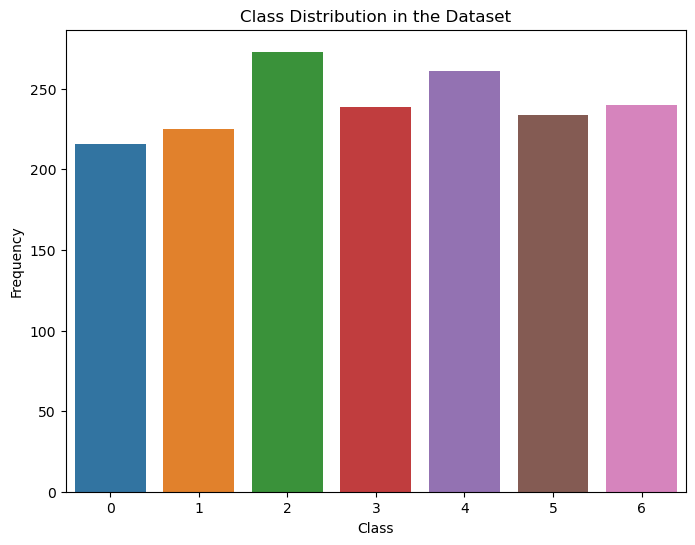

In [23]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = obesity_train_dataframe['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Dataset')
plt.show()

# STEP 3: DEFINING AND TRAINING AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

In [6]:
# DEFINING AND TRAINING AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

# IMPORTING BELOW LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Dense, Lambda, BatchNormalization, Embedding, Flatten, multiply, Concatenate, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

# ===============================================AE ARCHITECTURAL DESIGN======================================================

# Separate features and target
features = obesity_train_dataframe.drop('NObeyesdad', axis=1)
labels = obesity_train_dataframe['NObeyesdad']


# Split the balanced dataset into training and testing sets
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)

# We Normalize features 
scaler = MinMaxScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig_new)
X_test_orig_scaled = scaler.transform(X_test_orig_new)

# Add noise for autoencoder training
noise_factor = 0.05
X_train_noisy = X_train_orig_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_orig_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Define and compile Autoencoder architecture
input_dim = X_train_orig_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer) # can be adjusted to either increase or decrease architectural complexties
encoder = Dense(32, activation="relu")(encoder) # can be adjusted to either increase or decrease architectural complexties

# Bottleneck
bottleneck = Dense(16, activation="relu")(encoder) # can be adjusted to either increase or decrease architectural complexties

# Decoder
decoder = Dense(32, activation="relu")(bottleneck)# can be adjusted to either increase or decrease architectural complexties
decoder = Dense(64, activation="relu")(decoder) # can be adjusted to either increase or decrease architectural complexties
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder
autoencoder_obesity = Model(inputs=input_layer, outputs=decoder)
autoencoder_obesity.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder with noisy Data
autoencoder_obesity.fit(X_train_noisy, X_train_orig_scaled, epochs=2000, batch_size=32, validation_split=0.2, verbose=2)

# Generate synthetic features from the entire original dataset scaled
synthetic_features_scaled = autoencoder_obesity.predict(scaler.transform(features))

# Ensure synthetic data matches the original data's scale
# # Normalize synthetic data or features to original data range
synthetic_features = scaler.inverse_transform(synthetic_features_scaled)

# Train a classifier on the original dataset
# we'll use a simple RandomForestClassifier, which is a good starting point 
# for many classification tasks due to its versatility and ease of use
classifier = RandomForestClassifier(n_estimators=250, random_state=42)
classifier.fit(X_train_orig_new, y_train_orig_new)

# Predict labels for the synthetic features
# After training the classifier on the original data, we'll 
# use it to predict labels for the synthetic data generated from the autoencoder.
synthetic_labels_predicted = classifier.predict(synthetic_features)

# Convert synthetic features to a DataFrame
synthetic_data_df_ae = pd.DataFrame(synthetic_features, columns=features.columns)

# Convert predicted labels into a Series (assuming 'labels' is the name of your target variable)
synthetic_labels_df_ae = pd.Series(synthetic_labels_predicted, name='NObeyesdad') # , name='NObeyesdad'

# Example usage
print(synthetic_data_df_ae.head())
print(synthetic_labels_df_ae.head())


Epoch 1/2000

34/34 - 1s - loss: 0.1069 - val_loss: 0.0822 - 1s/epoch - 39ms/step
Epoch 2/2000
34/34 - 0s - loss: 0.0724 - val_loss: 0.0680 - 104ms/epoch - 3ms/step
Epoch 3/2000
34/34 - 0s - loss: 0.0592 - val_loss: 0.0539 - 87ms/epoch - 3ms/step
Epoch 4/2000
34/34 - 0s - loss: 0.0470 - val_loss: 0.0453 - 153ms/epoch - 4ms/step
Epoch 5/2000
34/34 - 0s - loss: 0.0392 - val_loss: 0.0380 - 90ms/epoch - 3ms/step
Epoch 6/2000
34/34 - 0s - loss: 0.0332 - val_loss: 0.0324 - 102ms/epoch - 3ms/step
Epoch 7/2000
34/34 - 0s - loss: 0.0275 - val_loss: 0.0268 - 90ms/epoch - 3ms/step
Epoch 8/2000
34/34 - 0s - loss: 0.0232 - val_loss: 0.0222 - 107ms/epoch - 3ms/step
Epoch 9/2000
34/34 - 0s - loss: 0.0197 - val_loss: 0.0193 - 100ms/epoch - 3ms/step
Epoch 10/2000
34/34 - 0s - loss: 0.0169 - val_loss: 0.0159 - 106ms/epoch - 3ms/step
Epoch 11/2000
34/34 - 0s - loss: 0.0145 - val_loss: 0.0143 - 100ms/epoch - 3ms/step
Epoch 12/2000
34/34 - 0s - loss: 0.0128 - val_loss: 0.0125 - 119ms/epoch - 3ms/step
Epoc

Epoch 94/2000
34/34 - 0s - loss: 0.0026 - val_loss: 0.0031 - 114ms/epoch - 3ms/step
Epoch 95/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0030 - 111ms/epoch - 3ms/step
Epoch 96/2000
34/34 - 0s - loss: 0.0026 - val_loss: 0.0031 - 91ms/epoch - 3ms/step
Epoch 97/2000
34/34 - 0s - loss: 0.0026 - val_loss: 0.0032 - 103ms/epoch - 3ms/step
Epoch 98/2000
34/34 - 0s - loss: 0.0026 - val_loss: 0.0031 - 107ms/epoch - 3ms/step
Epoch 99/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0031 - 87ms/epoch - 3ms/step
Epoch 100/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0031 - 101ms/epoch - 3ms/step
Epoch 101/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0031 - 100ms/epoch - 3ms/step
Epoch 102/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0031 - 121ms/epoch - 4ms/step
Epoch 103/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0031 - 100ms/epoch - 3ms/step
Epoch 104/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0031 - 88ms/epoch - 3ms/step
Epoch 105/2000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0030 - 98ms/epoch -

34/34 - 0s - loss: 0.0021 - val_loss: 0.0027 - 99ms/epoch - 3ms/step
Epoch 192/2000
34/34 - 0s - loss: 0.0020 - val_loss: 0.0026 - 100ms/epoch - 3ms/step
Epoch 193/2000
34/34 - 0s - loss: 0.0020 - val_loss: 0.0027 - 98ms/epoch - 3ms/step
Epoch 194/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0026 - 95ms/epoch - 3ms/step
Epoch 195/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0028 - 100ms/epoch - 3ms/step
Epoch 196/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0028 - 96ms/epoch - 3ms/step
Epoch 197/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0028 - 93ms/epoch - 3ms/step
Epoch 198/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0027 - 98ms/epoch - 3ms/step
Epoch 199/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0028 - 95ms/epoch - 3ms/step
Epoch 200/2000
34/34 - 0s - loss: 0.0021 - val_loss: 0.0027 - 103ms/epoch - 3ms/step
Epoch 201/2000
34/34 - 0s - loss: 0.0020 - val_loss: 0.0026 - 100ms/epoch - 3ms/step
Epoch 202/2000
34/34 - 0s - loss: 0.0020 - val_loss: 0.0026 - 96ms/epoch - 3ms/step
Epo

Epoch 289/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0025 - 106ms/epoch - 3ms/step
Epoch 290/2000
34/34 - 0s - loss: 0.0020 - val_loss: 0.0025 - 96ms/epoch - 3ms/step
Epoch 291/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0025 - 89ms/epoch - 3ms/step
Epoch 292/2000
34/34 - 0s - loss: 0.0020 - val_loss: 0.0027 - 96ms/epoch - 3ms/step
Epoch 293/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0026 - 94ms/epoch - 3ms/step
Epoch 294/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0025 - 95ms/epoch - 3ms/step
Epoch 295/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0025 - 97ms/epoch - 3ms/step
Epoch 296/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0025 - 91ms/epoch - 3ms/step
Epoch 297/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0026 - 95ms/epoch - 3ms/step
Epoch 298/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0026 - 100ms/epoch - 3ms/step
Epoch 299/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0026 - 101ms/epoch - 3ms/step
Epoch 300/2000
34/34 - 0s - loss: 0.0019 - val_loss: 0.0025 - 92ms/epoch 

34/34 - 0s - loss: 0.0018 - val_loss: 0.0027 - 107ms/epoch - 3ms/step
Epoch 387/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0028 - 106ms/epoch - 3ms/step
Epoch 388/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0029 - 107ms/epoch - 3ms/step
Epoch 389/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0028 - 106ms/epoch - 3ms/step
Epoch 390/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0028 - 120ms/epoch - 4ms/step
Epoch 391/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0028 - 100ms/epoch - 3ms/step
Epoch 392/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0028 - 106ms/epoch - 3ms/step
Epoch 393/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0029 - 94ms/epoch - 3ms/step
Epoch 394/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0029 - 93ms/epoch - 3ms/step
Epoch 395/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0029 - 106ms/epoch - 3ms/step
Epoch 396/2000
34/34 - 0s - loss: 0.0018 - val_loss: 0.0027 - 108ms/epoch - 3ms/step
Epoch 397/2000
34/34 - 0s - loss: 0.0017 - val_loss: 0.0028 - 100ms/epoch - 3ms/st

Epoch 483/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0028 - 91ms/epoch - 3ms/step
Epoch 484/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0030 - 96ms/epoch - 3ms/step
Epoch 485/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 89ms/epoch - 3ms/step
Epoch 486/2000
34/34 - 0s - loss: 0.0017 - val_loss: 0.0029 - 122ms/epoch - 4ms/step
Epoch 487/2000
34/34 - 0s - loss: 0.0017 - val_loss: 0.0030 - 108ms/epoch - 3ms/step
Epoch 488/2000
34/34 - 0s - loss: 0.0017 - val_loss: 0.0030 - 104ms/epoch - 3ms/step
Epoch 489/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0028 - 100ms/epoch - 3ms/step
Epoch 490/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 100ms/epoch - 3ms/step
Epoch 491/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 101ms/epoch - 3ms/step
Epoch 492/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0030 - 97ms/epoch - 3ms/step
Epoch 493/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0028 - 84ms/epoch - 2ms/step
Epoch 494/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 97ms/epo

34/34 - 0s - loss: 0.0016 - val_loss: 0.0030 - 97ms/epoch - 3ms/step
Epoch 581/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0030 - 97ms/epoch - 3ms/step
Epoch 582/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 100ms/epoch - 3ms/step
Epoch 583/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0029 - 93ms/epoch - 3ms/step
Epoch 584/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 102ms/epoch - 3ms/step
Epoch 585/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0030 - 110ms/epoch - 3ms/step
Epoch 586/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0029 - 109ms/epoch - 3ms/step
Epoch 587/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 100ms/epoch - 3ms/step
Epoch 588/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 102ms/epoch - 3ms/step
Epoch 589/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0028 - 104ms/epoch - 3ms/step
Epoch 590/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 97ms/epoch - 3ms/step
Epoch 591/2000
34/34 - 0s - loss: 0.0016 - val_loss: 0.0029 - 96ms/epoch - 3ms/step


Epoch 678/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0028 - 91ms/epoch - 3ms/step
Epoch 679/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0030 - 96ms/epoch - 3ms/step
Epoch 680/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0029 - 103ms/epoch - 3ms/step
Epoch 681/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0028 - 90ms/epoch - 3ms/step
Epoch 682/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0028 - 95ms/epoch - 3ms/step
Epoch 683/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0030 - 110ms/epoch - 3ms/step
Epoch 684/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0028 - 91ms/epoch - 3ms/step
Epoch 685/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0028 - 103ms/epoch - 3ms/step
Epoch 686/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0031 - 92ms/epoch - 3ms/step
Epoch 687/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0029 - 104ms/epoch - 3ms/step
Epoch 688/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0028 - 105ms/epoch - 3ms/step
Epoch 689/2000
34/34 - 0s - loss: 0.0015 - val_loss: 0.0030 - 104ms/epo

34/34 - 0s - loss: 0.0014 - val_loss: 0.0029 - 92ms/epoch - 3ms/step
Epoch 776/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0030 - 96ms/epoch - 3ms/step
Epoch 777/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0028 - 99ms/epoch - 3ms/step
Epoch 778/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0029 - 102ms/epoch - 3ms/step
Epoch 779/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0029 - 113ms/epoch - 3ms/step
Epoch 780/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 92ms/epoch - 3ms/step
Epoch 781/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 91ms/epoch - 3ms/step
Epoch 782/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 93ms/epoch - 3ms/step
Epoch 783/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 89ms/epoch - 3ms/step
Epoch 784/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 95ms/epoch - 3ms/step
Epoch 785/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 96ms/epoch - 3ms/step
Epoch 786/2000
34/34 - 0s - loss: 0.0014 - val_loss: 0.0029 - 92ms/epoch - 3ms/step
Epoch

Epoch 873/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 95ms/epoch - 3ms/step
Epoch 874/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 88ms/epoch - 3ms/step
Epoch 875/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 99ms/epoch - 3ms/step
Epoch 876/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 112ms/epoch - 3ms/step
Epoch 877/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0027 - 107ms/epoch - 3ms/step
Epoch 878/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0027 - 94ms/epoch - 3ms/step
Epoch 879/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0027 - 95ms/epoch - 3ms/step
Epoch 880/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 116ms/epoch - 3ms/step
Epoch 881/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 104ms/epoch - 3ms/step
Epoch 882/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0027 - 103ms/epoch - 3ms/step
Epoch 883/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 101ms/epoch - 3ms/step
Epoch 884/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 91ms/epo

34/34 - 0s - loss: 0.0012 - val_loss: 0.0030 - 93ms/epoch - 3ms/step
Epoch 971/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 106ms/epoch - 3ms/step
Epoch 972/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0027 - 92ms/epoch - 3ms/step
Epoch 973/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0028 - 88ms/epoch - 3ms/step
Epoch 974/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0030 - 96ms/epoch - 3ms/step
Epoch 975/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 94ms/epoch - 3ms/step
Epoch 976/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 96ms/epoch - 3ms/step
Epoch 977/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0030 - 108ms/epoch - 3ms/step
Epoch 978/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0030 - 102ms/epoch - 3ms/step
Epoch 979/2000
34/34 - 0s - loss: 0.0013 - val_loss: 0.0029 - 102ms/epoch - 3ms/step
Epoch 980/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0030 - 92ms/epoch - 3ms/step
Epoch 981/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 99ms/epoch - 3ms/step
Epo

34/34 - 0s - loss: 0.0012 - val_loss: 0.0028 - 96ms/epoch - 3ms/step
Epoch 1067/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0028 - 93ms/epoch - 3ms/step
Epoch 1068/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0028 - 98ms/epoch - 3ms/step
Epoch 1069/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0026 - 97ms/epoch - 3ms/step
Epoch 1070/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 96ms/epoch - 3ms/step
Epoch 1071/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0027 - 96ms/epoch - 3ms/step
Epoch 1072/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0028 - 95ms/epoch - 3ms/step
Epoch 1073/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0027 - 90ms/epoch - 3ms/step
Epoch 1074/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 102ms/epoch - 3ms/step
Epoch 1075/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0028 - 94ms/epoch - 3ms/step
Epoch 1076/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0028 - 97ms/epoch - 3ms/step
Epoch 1077/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 98ms/epoch - 3ms/

Epoch 1163/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0027 - 106ms/epoch - 3ms/step
Epoch 1164/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 113ms/epoch - 3ms/step
Epoch 1165/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 119ms/epoch - 4ms/step
Epoch 1166/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0026 - 104ms/epoch - 3ms/step
Epoch 1167/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0028 - 101ms/epoch - 3ms/step
Epoch 1168/2000
34/34 - 0s - loss: 0.0012 - val_loss: 0.0029 - 100ms/epoch - 3ms/step
Epoch 1169/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0027 - 94ms/epoch - 3ms/step
Epoch 1170/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0026 - 108ms/epoch - 3ms/step
Epoch 1171/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 88ms/epoch - 3ms/step
Epoch 1172/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0027 - 96ms/epoch - 3ms/step
Epoch 1173/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0028 - 100ms/epoch - 3ms/step
Epoch 1174/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0

Epoch 1259/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 102ms/epoch - 3ms/step
Epoch 1260/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0031 - 102ms/epoch - 3ms/step
Epoch 1261/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 102ms/epoch - 3ms/step
Epoch 1262/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 110ms/epoch - 3ms/step
Epoch 1263/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 120ms/epoch - 4ms/step
Epoch 1264/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 112ms/epoch - 3ms/step
Epoch 1265/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 97ms/epoch - 3ms/step
Epoch 1266/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 104ms/epoch - 3ms/step
Epoch 1267/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 115ms/epoch - 3ms/step
Epoch 1268/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 103ms/epoch - 3ms/step
Epoch 1269/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 90ms/epoch - 3ms/step
Epoch 1270/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.

Epoch 1355/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0031 - 122ms/epoch - 4ms/step
Epoch 1356/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0031 - 104ms/epoch - 3ms/step
Epoch 1357/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 119ms/epoch - 4ms/step
Epoch 1358/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0029 - 119ms/epoch - 4ms/step
Epoch 1359/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0029 - 115ms/epoch - 3ms/step
Epoch 1360/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 142ms/epoch - 4ms/step
Epoch 1361/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 108ms/epoch - 3ms/step
Epoch 1362/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0030 - 109ms/epoch - 3ms/step
Epoch 1363/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 117ms/epoch - 3ms/step
Epoch 1364/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 111ms/epoch - 3ms/step
Epoch 1365/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0030 - 111ms/epoch - 3ms/step
Epoch 1366/2000
34/34 - 0s - loss: 0.0011 - val_loss: 

Epoch 1451/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0030 - 101ms/epoch - 3ms/step
Epoch 1452/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 86ms/epoch - 3ms/step
Epoch 1453/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 95ms/epoch - 3ms/step
Epoch 1454/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 110ms/epoch - 3ms/step
Epoch 1455/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0028 - 91ms/epoch - 3ms/step
Epoch 1456/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 89ms/epoch - 3ms/step
Epoch 1457/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 92ms/epoch - 3ms/step
Epoch 1458/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0028 - 92ms/epoch - 3ms/step
Epoch 1459/2000
34/34 - 0s - loss: 0.0011 - val_loss: 0.0029 - 94ms/epoch - 3ms/step
Epoch 1460/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 95ms/epoch - 3ms/step
Epoch 1461/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0029 - 88ms/epoch - 3ms/step
Epoch 1462/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 

Epoch 1547/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0027 - 92ms/epoch - 3ms/step
Epoch 1548/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0025 - 115ms/epoch - 3ms/step
Epoch 1549/2000
34/34 - 0s - loss: 9.9723e-04 - val_loss: 0.0027 - 102ms/epoch - 3ms/step
Epoch 1550/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0027 - 91ms/epoch - 3ms/step
Epoch 1551/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 97ms/epoch - 3ms/step
Epoch 1552/2000
34/34 - 0s - loss: 9.9155e-04 - val_loss: 0.0028 - 98ms/epoch - 3ms/step
Epoch 1553/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 99ms/epoch - 3ms/step
Epoch 1554/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0030 - 97ms/epoch - 3ms/step
Epoch 1555/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0030 - 105ms/epoch - 3ms/step
Epoch 1556/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 85ms/epoch - 2ms/step
Epoch 1557/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 104ms/epoch - 3ms/step
Epoch 1558/2000
34/34 - 0s - loss: 0.0010 - val_loss:

34/34 - 0s - loss: 9.8140e-04 - val_loss: 0.0030 - 88ms/epoch - 3ms/step
Epoch 1642/2000
34/34 - 0s - loss: 9.6772e-04 - val_loss: 0.0029 - 94ms/epoch - 3ms/step
Epoch 1643/2000
34/34 - 0s - loss: 9.6394e-04 - val_loss: 0.0027 - 88ms/epoch - 3ms/step
Epoch 1644/2000
34/34 - 0s - loss: 9.7502e-04 - val_loss: 0.0028 - 83ms/epoch - 2ms/step
Epoch 1645/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0028 - 102ms/epoch - 3ms/step
Epoch 1646/2000
34/34 - 0s - loss: 9.6100e-04 - val_loss: 0.0029 - 101ms/epoch - 3ms/step
Epoch 1647/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0027 - 90ms/epoch - 3ms/step
Epoch 1648/2000
34/34 - 0s - loss: 9.6588e-04 - val_loss: 0.0028 - 85ms/epoch - 2ms/step
Epoch 1649/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0029 - 76ms/epoch - 2ms/step
Epoch 1650/2000
34/34 - 0s - loss: 9.7634e-04 - val_loss: 0.0027 - 92ms/epoch - 3ms/step
Epoch 1651/2000
34/34 - 0s - loss: 9.9899e-04 - val_loss: 0.0027 - 95ms/epoch - 3ms/step
Epoch 1652/2000
34/34 - 0s - loss: 9.7608e-04 -

Epoch 1734/2000
34/34 - 0s - loss: 9.4536e-04 - val_loss: 0.0026 - 93ms/epoch - 3ms/step
Epoch 1735/2000
34/34 - 0s - loss: 9.5928e-04 - val_loss: 0.0026 - 90ms/epoch - 3ms/step
Epoch 1736/2000
34/34 - 0s - loss: 9.8077e-04 - val_loss: 0.0027 - 101ms/epoch - 3ms/step
Epoch 1737/2000
34/34 - 0s - loss: 9.6208e-04 - val_loss: 0.0027 - 95ms/epoch - 3ms/step
Epoch 1738/2000
34/34 - 0s - loss: 0.0010 - val_loss: 0.0027 - 103ms/epoch - 3ms/step
Epoch 1739/2000
34/34 - 0s - loss: 9.9898e-04 - val_loss: 0.0026 - 94ms/epoch - 3ms/step
Epoch 1740/2000
34/34 - 0s - loss: 9.9361e-04 - val_loss: 0.0028 - 84ms/epoch - 2ms/step
Epoch 1741/2000
34/34 - 0s - loss: 9.7324e-04 - val_loss: 0.0028 - 103ms/epoch - 3ms/step
Epoch 1742/2000
34/34 - 0s - loss: 9.5626e-04 - val_loss: 0.0025 - 100ms/epoch - 3ms/step
Epoch 1743/2000
34/34 - 0s - loss: 9.9136e-04 - val_loss: 0.0026 - 102ms/epoch - 3ms/step
Epoch 1744/2000
34/34 - 0s - loss: 9.7547e-04 - val_loss: 0.0026 - 103ms/epoch - 3ms/step
Epoch 1745/2000
34/

Epoch 1826/2000
34/34 - 0s - loss: 9.2688e-04 - val_loss: 0.0026 - 101ms/epoch - 3ms/step
Epoch 1827/2000
34/34 - 0s - loss: 9.1747e-04 - val_loss: 0.0027 - 95ms/epoch - 3ms/step
Epoch 1828/2000
34/34 - 0s - loss: 9.3094e-04 - val_loss: 0.0027 - 94ms/epoch - 3ms/step
Epoch 1829/2000
34/34 - 0s - loss: 9.5303e-04 - val_loss: 0.0028 - 91ms/epoch - 3ms/step
Epoch 1830/2000
34/34 - 0s - loss: 9.8519e-04 - val_loss: 0.0027 - 86ms/epoch - 3ms/step
Epoch 1831/2000
34/34 - 0s - loss: 9.6973e-04 - val_loss: 0.0027 - 88ms/epoch - 3ms/step
Epoch 1832/2000
34/34 - 0s - loss: 9.6102e-04 - val_loss: 0.0027 - 96ms/epoch - 3ms/step
Epoch 1833/2000
34/34 - 0s - loss: 9.8076e-04 - val_loss: 0.0030 - 102ms/epoch - 3ms/step
Epoch 1834/2000
34/34 - 0s - loss: 9.6913e-04 - val_loss: 0.0027 - 94ms/epoch - 3ms/step
Epoch 1835/2000
34/34 - 0s - loss: 9.4019e-04 - val_loss: 0.0026 - 104ms/epoch - 3ms/step
Epoch 1836/2000
34/34 - 0s - loss: 9.6392e-04 - val_loss: 0.0028 - 111ms/epoch - 3ms/step
Epoch 1837/2000
3

Epoch 1918/2000
34/34 - 0s - loss: 9.3698e-04 - val_loss: 0.0029 - 100ms/epoch - 3ms/step
Epoch 1919/2000
34/34 - 0s - loss: 9.3138e-04 - val_loss: 0.0028 - 92ms/epoch - 3ms/step
Epoch 1920/2000
34/34 - 0s - loss: 9.3182e-04 - val_loss: 0.0029 - 89ms/epoch - 3ms/step
Epoch 1921/2000
34/34 - 0s - loss: 9.6094e-04 - val_loss: 0.0029 - 97ms/epoch - 3ms/step
Epoch 1922/2000
34/34 - 0s - loss: 9.3415e-04 - val_loss: 0.0027 - 98ms/epoch - 3ms/step
Epoch 1923/2000
34/34 - 0s - loss: 9.1773e-04 - val_loss: 0.0028 - 88ms/epoch - 3ms/step
Epoch 1924/2000
34/34 - 0s - loss: 9.2928e-04 - val_loss: 0.0026 - 98ms/epoch - 3ms/step
Epoch 1925/2000
34/34 - 0s - loss: 9.6599e-04 - val_loss: 0.0028 - 92ms/epoch - 3ms/step
Epoch 1926/2000
34/34 - 0s - loss: 9.3845e-04 - val_loss: 0.0029 - 96ms/epoch - 3ms/step
Epoch 1927/2000
34/34 - 0s - loss: 9.0369e-04 - val_loss: 0.0026 - 107ms/epoch - 3ms/step
Epoch 1928/2000
34/34 - 0s - loss: 9.1245e-04 - val_loss: 0.0027 - 85ms/epoch - 3ms/step
Epoch 1929/2000
34/

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# SAVE THE ABOVE CREATED GENERATIVE AUTOENCODER MODEL

In [8]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
autoencoder_obesity.save('autoencoder_obesity.h5')  # Saves the model to an HDF5 file


C:\Users\Ede\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
autoencoder_obesity.save('autoencoder_obesity.keras')  # Saves the model to an HDF5 file


# Join the Generated Synthetic Data and labels

In [12]:
import pandas as pd

# Assuming 'synthetic_data_df_ae' is your DataFrame containing the synthetic data
# and 'synthetic_labels_df_ae' is the Series with the corresponding labels

ae_synthetic_obesity_data_with_labels_df = synthetic_data_df_ae.assign(NObeyesdad=synthetic_labels_df_ae.values)

In [43]:
ae_synthetic_obesity_data_with_labels_df.head()

Gender        Age    Height      Weight  \
0  3.275675e-14  21.288153  1.603433   60.083675   
1  2.956646e-06  21.013594  1.748950  135.939789   
2  2.389378e-03  23.451710  1.667810   84.657799   
3  1.596184e-10  20.685471  1.583208   42.873848   
4  9.999998e-01  25.189976  1.823511  106.113350   

   family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
0                         1.00000  0.999917  2.994612  3.125243  0.063134   
1                         1.00000  0.999987  2.992091  3.022789  1.980574   
2                         1.00000  1.000000  1.277906  1.458956  2.025146   
3                         0.00001  0.000087  2.978825  1.777998  1.067333   
4                         1.00000  0.999996  2.972514  2.862388  2.005027   

          SMOKE      CH2O           SCC       FAF       TUE      CALC  \
0  9.999997e-01  2.162108  4.559825e-08  2.378299  0.000981  1.866779   
1  4.267266e-07  2.884090  4.220837e-06  1.372048  0.694998  2.031628   
2  1.978585e-04  2.883020  4.165323e-07  0.115494  1.635412  2.111593   
3  1.147330e-12  2.588604  7.833492e-12  0.844929  0.002247  2.995464   
4  2.542692e-08  2.936752  9.473663e-08  1.958116  0.580014  2.020417   

     MTRANS  NObeyesdad  
0  3.005749           1  
1  3.011738           4  
2  2.716356           2  
3  3.145981           0  
4  3.131619           2

In [44]:
ae_synthetic_obesity_data_with_labels_df.head()

Gender        Age    Height      Weight  \
0  3.275675e-14  21.288153  1.603433   60.083675   
1  2.956646e-06  21.013594  1.748950  135.939789   
2  2.389378e-03  23.451710  1.667810   84.657799   
3  1.596184e-10  20.685471  1.583208   42.873848   
4  9.999998e-01  25.189976  1.823511  106.113350   

   family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
0                         1.00000  0.999917  2.994612  3.125243  0.063134   
1                         1.00000  0.999987  2.992091  3.022789  1.980574   
2                         1.00000  1.000000  1.277906  1.458956  2.025146   
3                         0.00001  0.000087  2.978825  1.777998  1.067333   
4                         1.00000  0.999996  2.972514  2.862388  2.005027   

          SMOKE      CH2O           SCC       FAF       TUE      CALC  \
0  9.999997e-01  2.162108  4.559825e-08  2.378299  0.000981  1.866779   
1  4.267266e-07  2.884090  4.220837e-06  1.372048  0.694998  2.031628   
2  1.978585e-04  2.883020  4.165323e-07  0.115494  1.635412  2.111593   
3  1.147330e-12  2.588604  7.833492e-12  0.844929  0.002247  2.995464   
4  2.542692e-08  2.936752  9.473663e-08  1.958116  0.580014  2.020417   

     MTRANS  NObeyesdad  
0  3.005749           1  
1  3.011738           4  
2  2.716356           2  
3  3.145981           0  
4  3.131619           2

# SAVING THE GENERATED AE SYNTHETIC DATASET TO CSV

In [13]:
# Save the generated synthetic data to a CSV file

ae_synthetic_obesity_data_with_labels_df.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\ae_synthetic_obesity_data_with_labels.csv', index=False)


In [60]:
control_dataframe.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
544        0  20.406871  1.755978   53.699561                               1   
1987       0  26.000000  1.624950  111.004920                               1   
420        1  18.000000  1.850000   60.000000                               1   
527        0  21.000000  1.520000   42.000000                               0   
196        1  22.000000  1.750000   74.000000                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
544      1   2.0  3.891994     1      0  1.863930    0  2.870127  2.000000   
1987     1   3.0  3.000000     2      0  2.704315    0  0.000000  0.322666   
420      1   3.0  4.000000     2      0  2.000000    1  2.000000  0.000000   
527      1   3.0  1.000000     1      0  1.000000    0  0.000000  0.000000   
196      0   2.0  3.000000     2      0  2.000000    0  1.000000  2.000000   

      CALC  MTRANS  NObeyesdad  
544      3       3           0  
1987     2       3           4  
420      2       0           0  
527      2       3           0  
196      2       1           1

In [46]:
synthetic_data_df_ae.head()

Gender        Age    Height      Weight  \
0  3.275675e-14  21.288153  1.603433   60.083675   
1  2.956646e-06  21.013594  1.748950  135.939789   
2  2.389378e-03  23.451710  1.667810   84.657799   
3  1.596184e-10  20.685471  1.583208   42.873848   
4  9.999998e-01  25.189976  1.823511  106.113350   

   family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
0                         1.00000  0.999917  2.994612  3.125243  0.063134   
1                         1.00000  0.999987  2.992091  3.022789  1.980574   
2                         1.00000  1.000000  1.277906  1.458956  2.025146   
3                         0.00001  0.000087  2.978825  1.777998  1.067333   
4                         1.00000  0.999996  2.972514  2.862388  2.005027   

          SMOKE      CH2O           SCC       FAF       TUE      CALC  \
0  9.999997e-01  2.162108  4.559825e-08  2.378299  0.000981  1.866779   
1  4.267266e-07  2.884090  4.220837e-06  1.372048  0.694998  2.031628   
2  1.978585e-04  2.883020  4.165323e-07  0.115494  1.635412  2.111593   
3  1.147330e-12  2.588604  7.833492e-12  0.844929  0.002247  2.995464   
4  2.542692e-08  2.936752  9.473663e-08  1.958116  0.580014  2.020417   

     MTRANS  
0  3.005749  
1  3.011738  
2  2.716356  
3  3.145981  
4  3.131619

In [30]:
synthetic_data_df_ae_new.tail()

Gender        Age    Height      Weight  \
1683  9.999598e-01  31.085964  1.768549  119.295097   
1684  1.000000e+00  23.381527  1.701718   80.600937   
1685  2.626654e-06  24.437094  1.652167   83.432747   
1686  4.804098e-07  23.275984  1.629107   82.523338   
1687  1.000000e+00  19.333105  1.816475   82.996666   

      family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
1683                        1.000000  0.999954  2.959612  2.948931  2.018005   
1684                        0.999995  1.000000  2.030780  1.388730  1.992988   
1685                        0.999999  1.000000  1.928747  3.055628  1.968219   
1686                        1.000000  1.000000  2.033897  2.968626  1.978162   
1687                        0.999922  0.999999  2.960520  3.027821  1.946548   

             SMOKE      CH2O           SCC       FAF       TUE      CALC  \
1683  4.075995e-06  2.529626  2.790805e-09  0.937853  1.328382  1.994289   
1684  2.446327e-06  1.404170  2.192585e-09  0.887366  0.976991  2.010472   
1685  2.635644e-08  2.000097  1.029977e-06  0.030137  1.977770  2.991874   
1686  1.075162e-09  2.034657  1.866273e-06  1.018719  0.644987  2.998436   
1687  7.263842e-10  2.955674  1.007690e-06  2.494448  0.525577  1.998816   

        MTRANS  
1683  0.014208  
1684  2.908818  
1685  2.951241  
1686  2.998566  
1687  3.022913

In [47]:
synthetic_labels_df_ae.head()

0    1
1    4
2    2
3    0
4    2
Name: NObeyesdad, dtype: int64

In [128]:
features = obesity_train_dataframe.drop('NObeyesdad', axis=1)
labels = obesity_train_dataframe['NObeyesdad']

# Split the balanced dataset into training and testing sets
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)

# Confirm the shapes   
print("X_train_syn shape:", X_train_orig_new.shape)
print("X_test_syn shape:", X_test_orig_new.shape)
print("y_train_syn shape:", y_train_orig_new.shape)
print("y_test_syn shape:", y_test_orig_new.shape)

X_train_syn shape: (1350, 16)
X_test_syn shape: (338, 16)
y_train_syn shape: (1350,)
y_test_syn shape: (338,)


In [130]:
featuresCONT = control_dataframe.drop('NObeyesdad', axis=1)
labelsCONT = control_dataframe['NObeyesdad']

# Split the dataset into training and testing sets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont shape:", X_train_cont.shape)
print("X_test_cont shape:", X_test_cont.shape)
print("y_train_cont shape:", y_train_cont.shape)
print("y_test_cont shape:", y_test_cont.shape)

X_train_cont shape: (338, 16)
X_test_cont shape: (85, 16)
y_train_cont shape: (338,)
y_test_cont shape: (85,)


In [131]:
features_AE = ae_synthetic_obesity_data_with_labels_df.drop('NObeyesdad', axis=1)
labels_AE = ae_synthetic_obesity_data_with_labels_df['NObeyesdad']

# Split the dataset into training and testing sets
X_train_synt, X_test_synt, y_train_synt, y_test_synt = train_test_split(features_AE, labels_AE, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_synt shape:", X_train_synt.shape)
print("X_test_synt shape:", X_test_synt.shape)
print("y_train_synt shape:", y_train_synt.shape)
print("y_test_synt shape:", y_test_synt.shape)

X_train_synt shape: (1350, 16)
X_test_synt shape: (338, 16)
y_train_synt shape: (1350,)
y_test_synt shape: (338,)


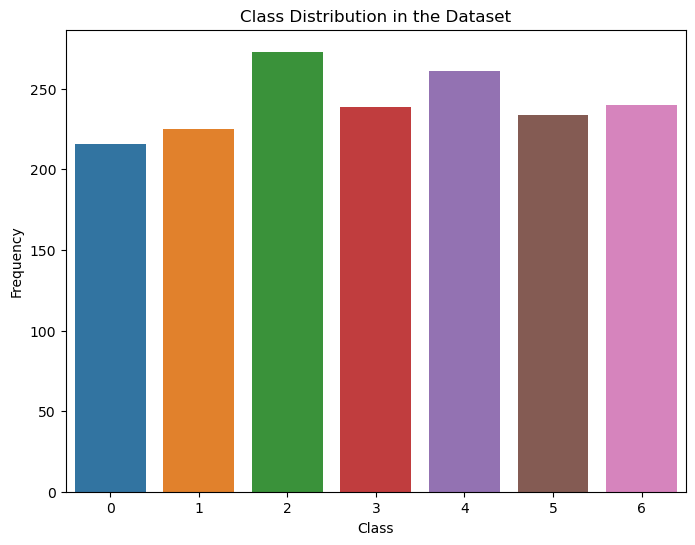

In [34]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = obesity_train_dataframe['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Dataset')
plt.show()

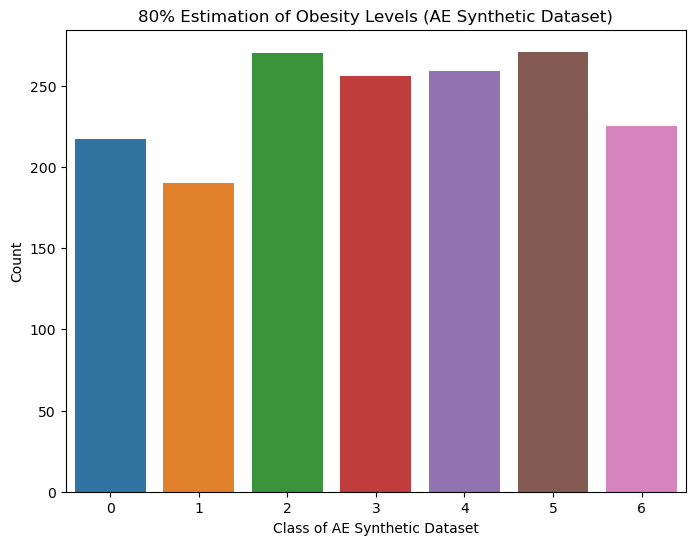

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# If ae_synthetic_labels_df is a DataFrame with a column named 'PredictedLabels'
plt.figure(figsize=(8, 6))
sns.countplot(x=synthetic_labels_df_ae_new, data=synthetic_data_df_ae_new)
plt.title('80% Estimation of Obesity Levels (AE Synthetic Dataset)')
plt.xlabel('Class of AE Synthetic Dataset')
plt.ylabel('Count')
plt.show()

# Computation and Graphical Representations of AUC-ROC Curves by Classifiers 

# RANDOM FOREST

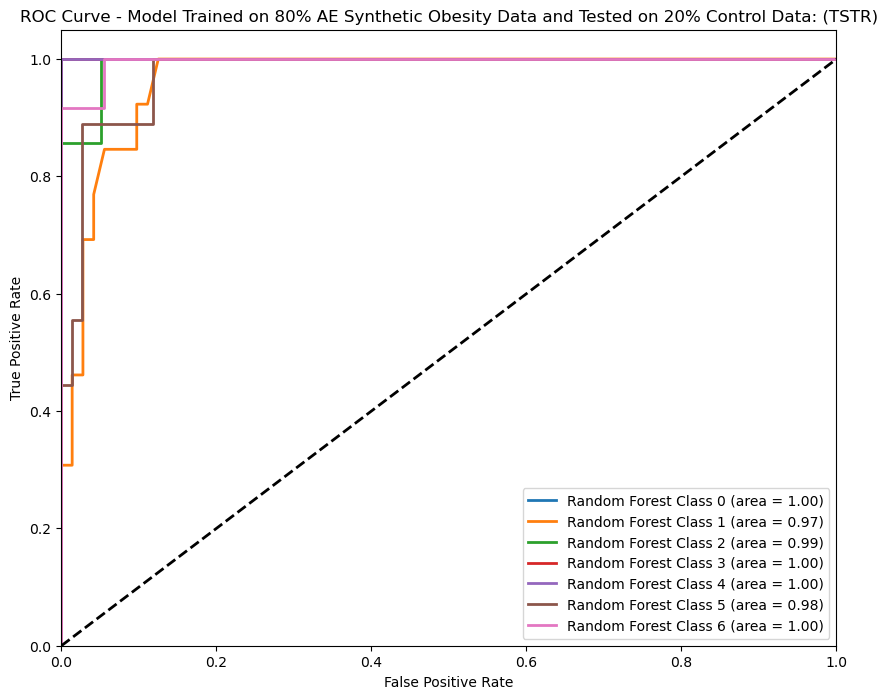

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Assuming synthetic_features_scaled and ae_synthetic_labels_df are your synthetic features and labels
# And X_train, X_test, y_train, y_test are your original dataset split

X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae_new, synthetic_labels_df_ae_new, test_size=0.2, random_state=42)

# Preparing the classifier
classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_syn_new, y_train_syn_new)

# Predict probabilities on the original test set
y_score_test_on_synthetic_model = classifier_on_synthetic.predict_proba(X_test_cont)

# Binarize the original labels for AUC-ROC calculation
lb = LabelBinarizer()
lb.fit(y_train_cont)
y_test_binarized = lb.transform(y_test_cont)

# Calculate ROC AUC for each class in the original test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label='Random Forest Class {0} (area = {1:0.2f})'.format(i, roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Trained on 80% AE Synthetic Obesity Data and Tested on 20% Control Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


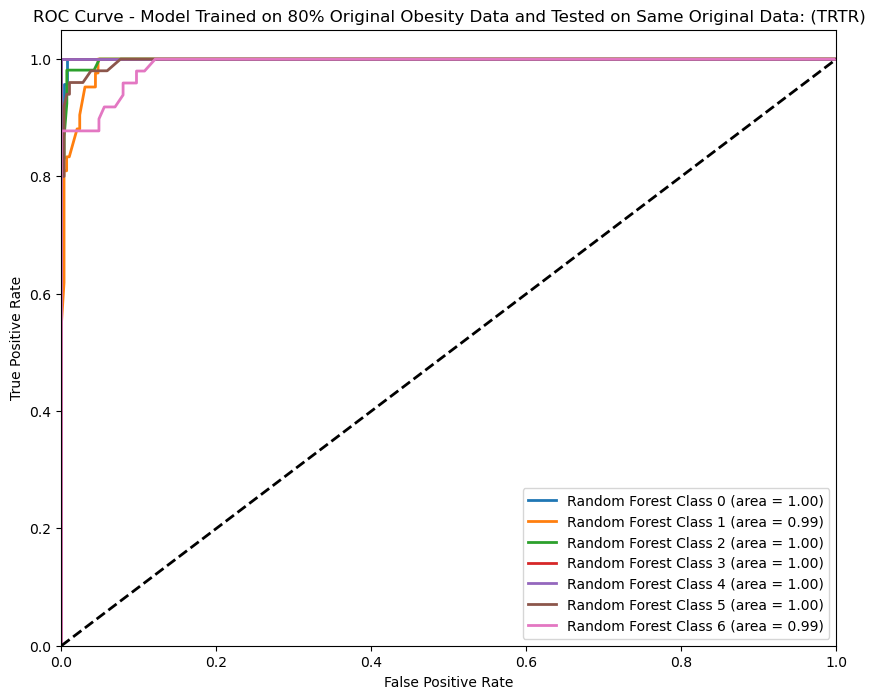

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Assuming synthetic_features_scaled and ae_synthetic_labels_df are your synthetic features and labels
# And X_train, X_test, y_train, y_test are your original dataset split

X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)

# Preparing the classifier
classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_orig_new, y_train_orig_new)

# Predict probabilities on the original test set
y_score_test_on_synthetic_model = classifier_on_synthetic.predict_proba(X_test_orig_new)

# Binarize the original labels for AUC-ROC calculation
lb = LabelBinarizer()
lb.fit(y_train_orig_new)
y_test_binarized = lb.transform(y_test_orig_new)

# Calculate ROC AUC for each class in the original test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label='Random Forest Class {0} (area = {1:0.2f})'.format(i, roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Trained on 80% Original Obesity Data and Tested on Same Original Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


# MICRO-AVERAGE ROC CURVES

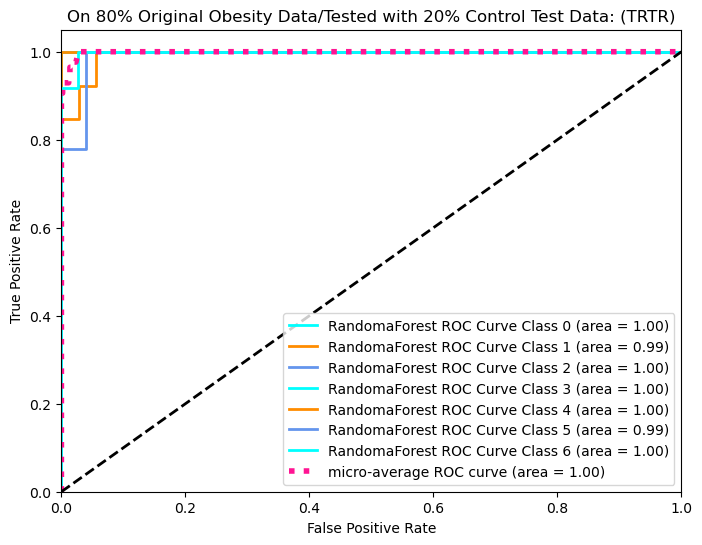

In [224]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_orig_new, y_train_orig_new)

# Assuming y_test_cont is your control test labels (unseen data)
# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = classifier_on_synthetic.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='RandomaForest ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


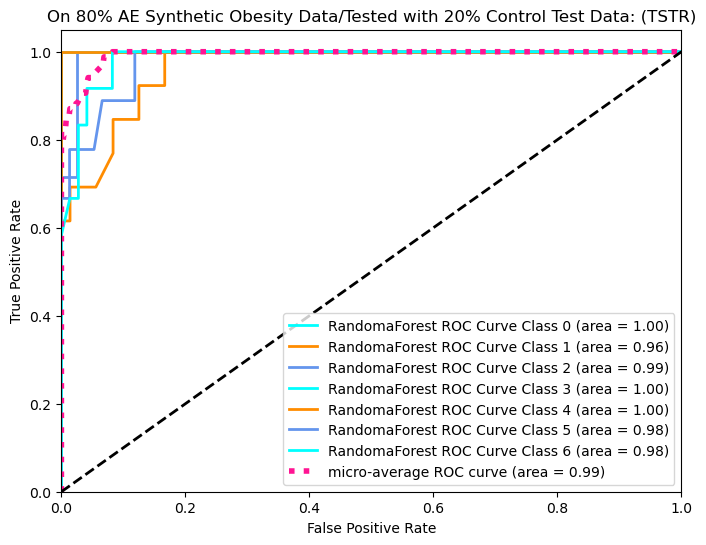

In [223]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_syn_new, y_train_syn_new)

# Assuming y_test_cont is your control test labels
# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = classifier_on_synthetic.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='RandomaForest ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


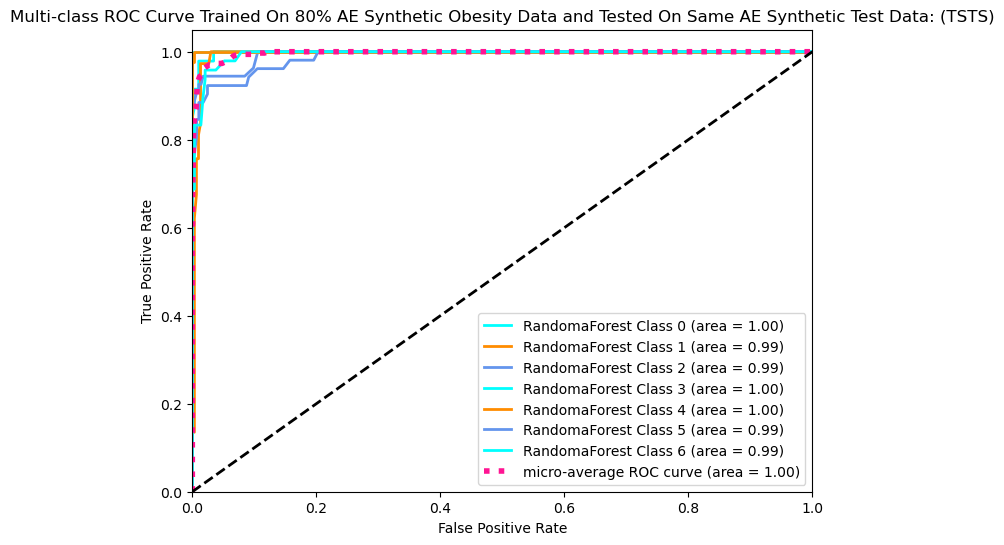

In [78]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_syn_new))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_syn_new)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_syn_new is your control test features
y_score = classifier_on_synthetic.predict_proba(X_test_syn_new)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='RandomaForest Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve Trained On 80% AE Synthetic Obesity Data and Tested On Same AE Synthetic Test Data: (TSTS)')
plt.legend(loc="lower right")
plt.show()


# GRADIENT BOOSTING

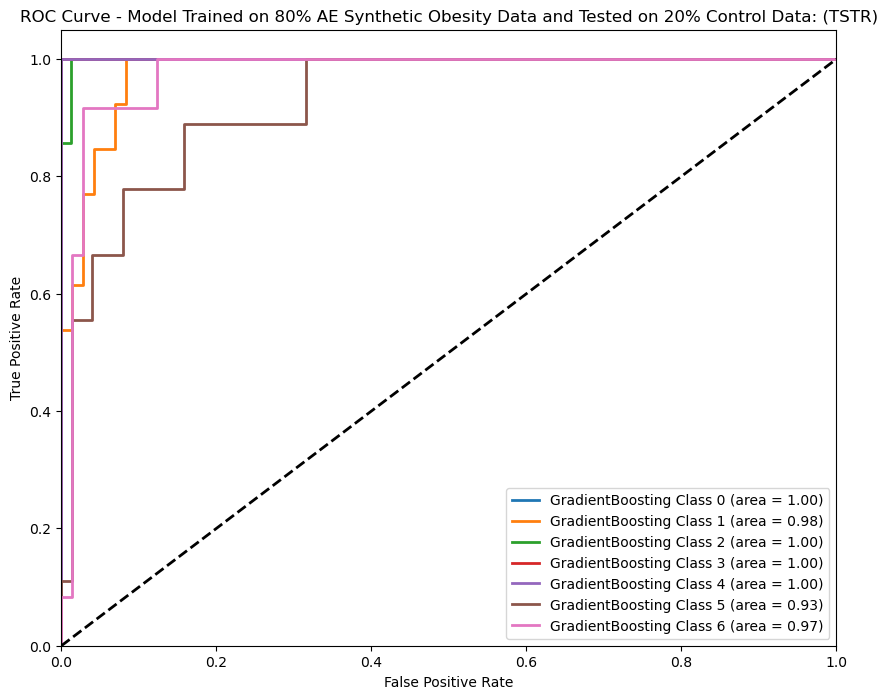

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)

# Preparing the classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_syn_new, y_train_syn_new)

# Predict probabilities on the original test set
y_score_test_on_synthetic_model = gb_classifier.predict_proba(X_test_cont)

# Binarize the original labels for AUC-ROC calculation
lb = LabelBinarizer()
lb.fit(y_train_cont)
y_test_binarized = lb.transform(y_test_cont)

# Calculate ROC AUC for each class in the original test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label='GradientBoosting Class {0} (area = {1:0.2f})'.format(i, roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Trained on 80% AE Synthetic Obesity Data and Tested on 20% Control Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


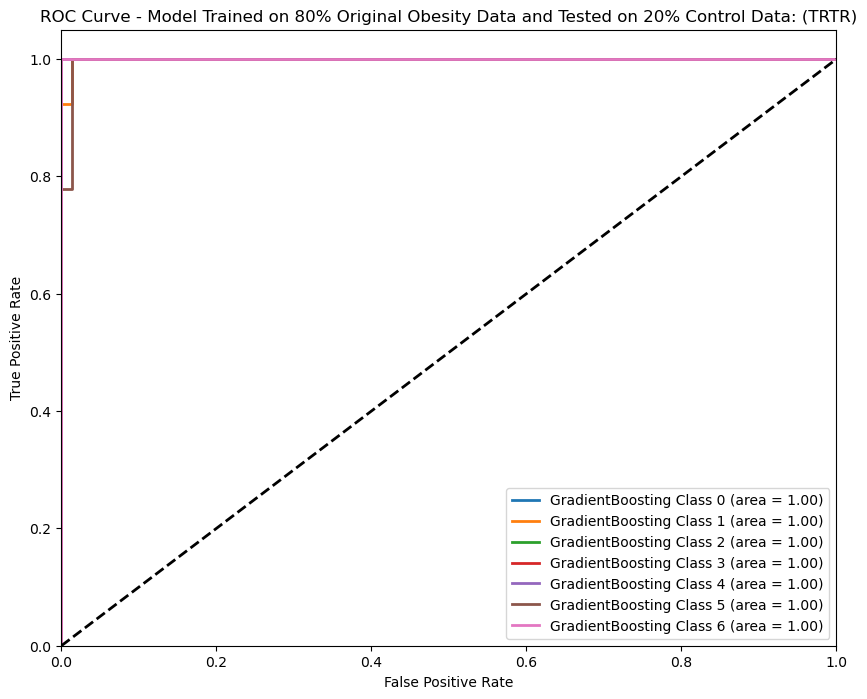

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)

# Preparing the classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_orig_new, y_train_orig_new)

# Predict probabilities on the original test set
y_score_test_on_synthetic_model = gb_classifier.predict_proba(X_test_cont)

# Binarize the original labels for AUC-ROC calculation
lb = LabelBinarizer()
lb.fit(y_train_cont)
y_test_binarized = lb.transform(y_test_cont)

# Calculate ROC AUC for each class in the original test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label='GradientBoosting Class {0} (area = {1:0.2f})'.format(i, roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Trained on 80% Original Obesity Data and Tested on 20% Control Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


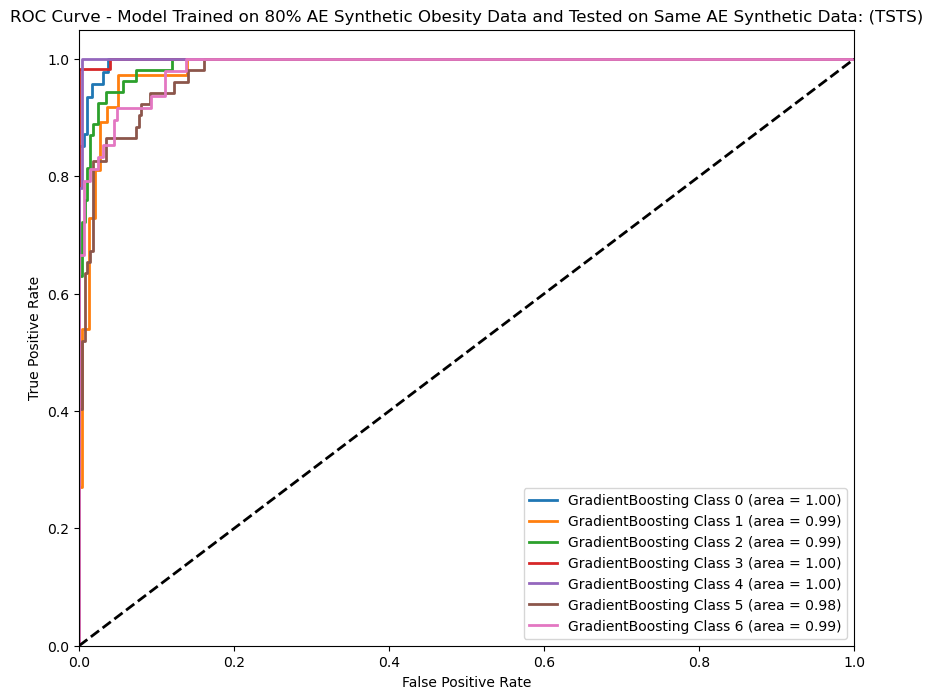

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)

# Preparing the classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_syn_new, y_train_syn_new)

# Predict probabilities on the original test set
y_score_test_on_synthetic_model = gb_classifier.predict_proba(X_test_syn_new)

# Binarize the original labels for AUC-ROC calculation
lb = LabelBinarizer()
lb.fit(y_train_syn_new)
y_test_binarized = lb.transform(y_test_syn_new)

# Calculate ROC AUC for each class in the original test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_binarized[:, i], y_score_test_on_synthetic_model[:, i])

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label='GradientBoosting Class {0} (area = {1:0.2f})'.format(i, roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Trained on 80% AE Synthetic Obesity Data and Tested on Same AE Synthetic Data: (TSTS)')
plt.legend(loc="lower right")
plt.show()


# MICRO AVERAGE ROC CURVES

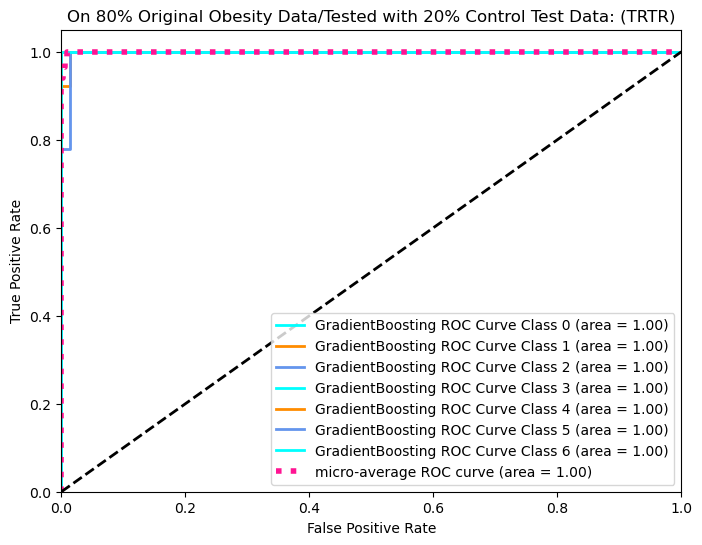

In [222]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = gb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='GradientBoosting ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


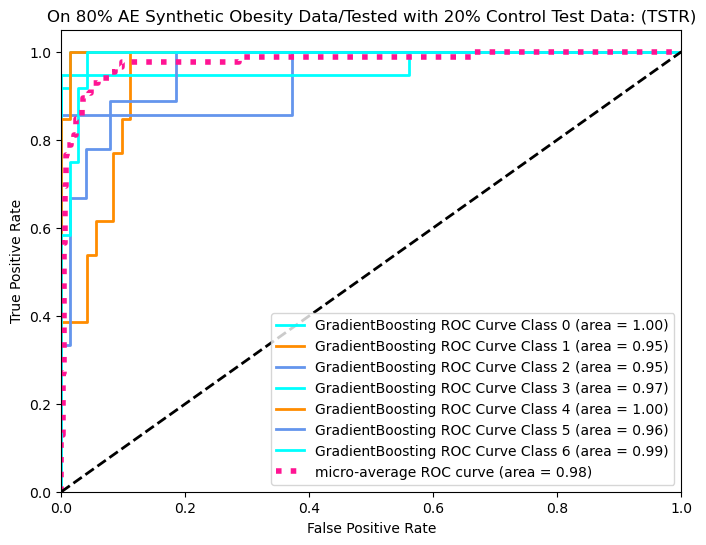

In [221]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_syn_new, y_train_syn_new)

# Assuming y_test_syn is your control test labels
# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = gb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='GradientBoosting ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


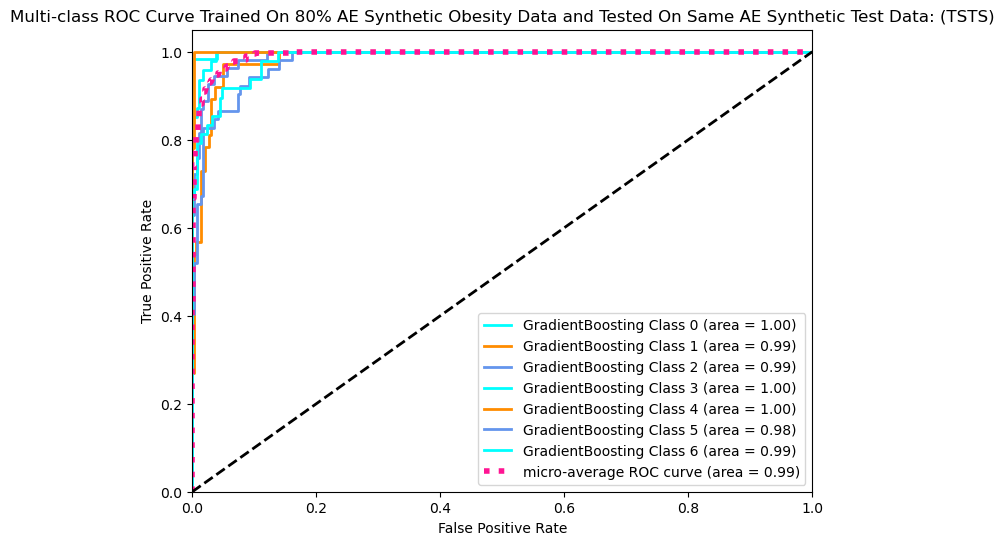

In [87]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_syn_new))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_syn_new)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_control is your control test features
y_score = gb_classifier.predict_proba(X_test_syn_new)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='GradientBoosting ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve Trained On 80% AE Synthetic Obesity Data and Tested On Same AE Synthetic Test Data: (TSTS)')
plt.legend(loc="lower right")
plt.show()


# CONTINUATION OF ROC CURVES

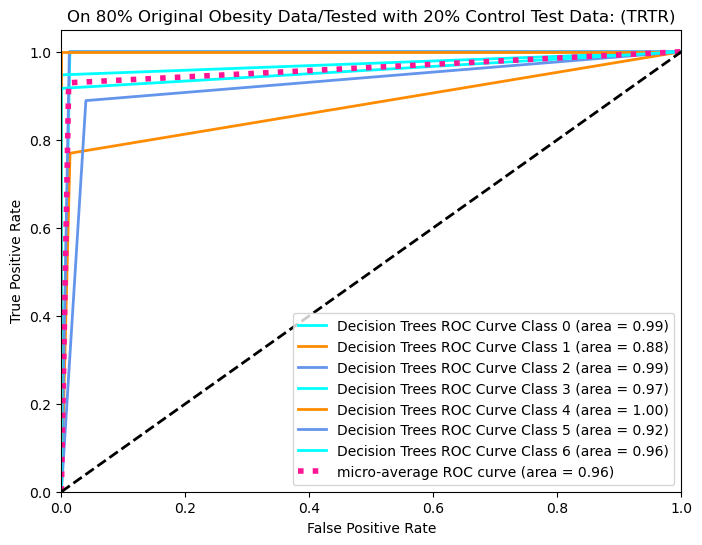

In [219]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


dct_classifier = DecisionTreeClassifier()
dct_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = dct_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Decision Trees ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


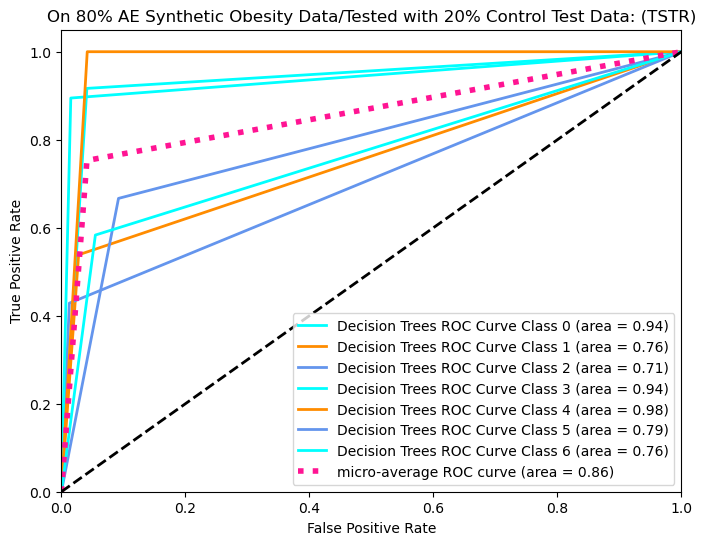

In [218]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


dct_classifier = DecisionTreeClassifier()
dct_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = dct_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Decision Trees ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


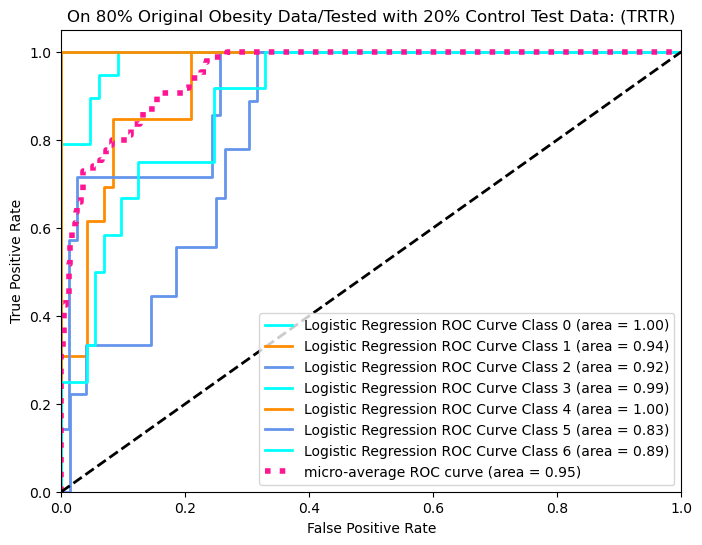

In [215]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


lgr_classifier = LogisticRegression()
lgr_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgr_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Logistic Regression ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


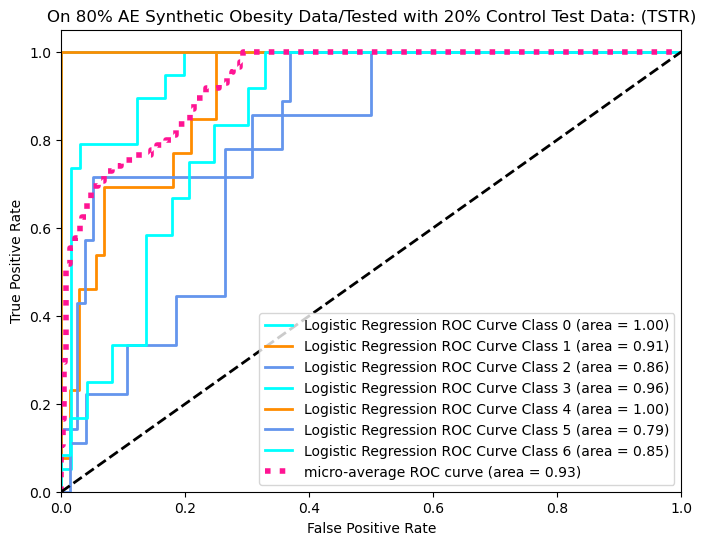

In [216]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


lgr_classifier = LogisticRegression()
lgr_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgr_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Logistic Regression ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


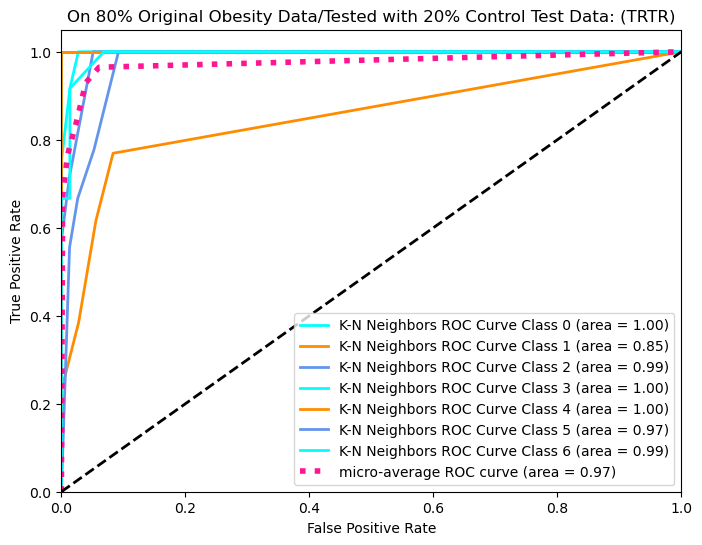

In [210]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = knn_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='K-N Neighbors ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


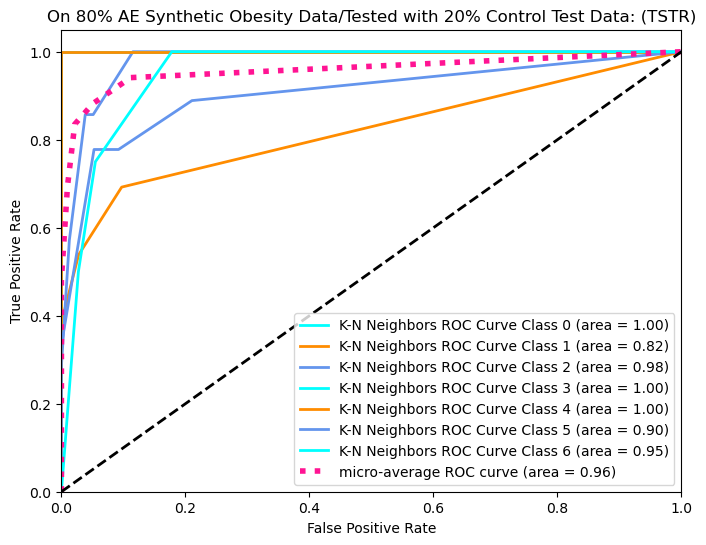

In [209]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = knn_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='K-N Neighbors ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


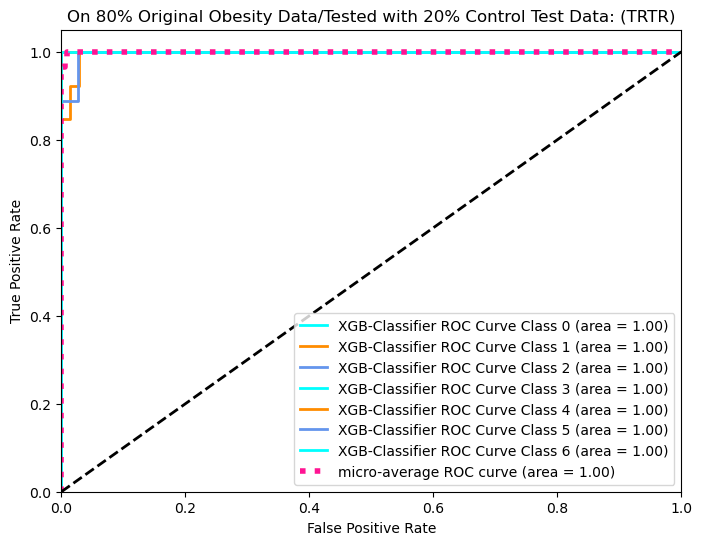

In [208]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = xgb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='XGB-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


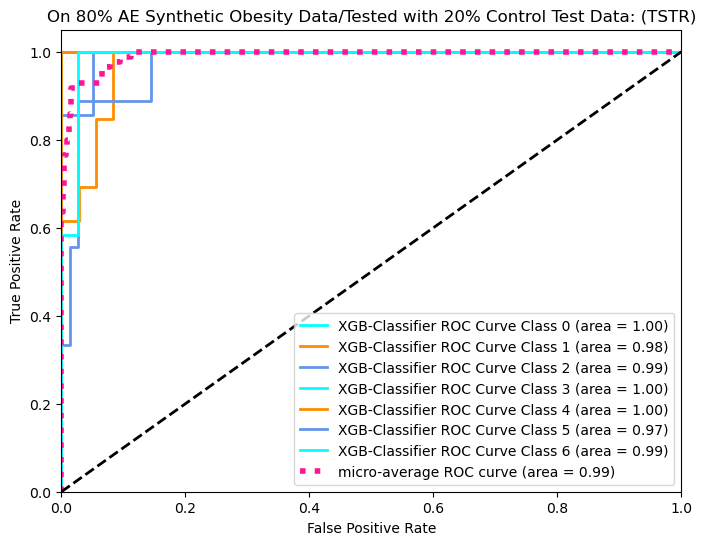

In [205]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = xgb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='XGB-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


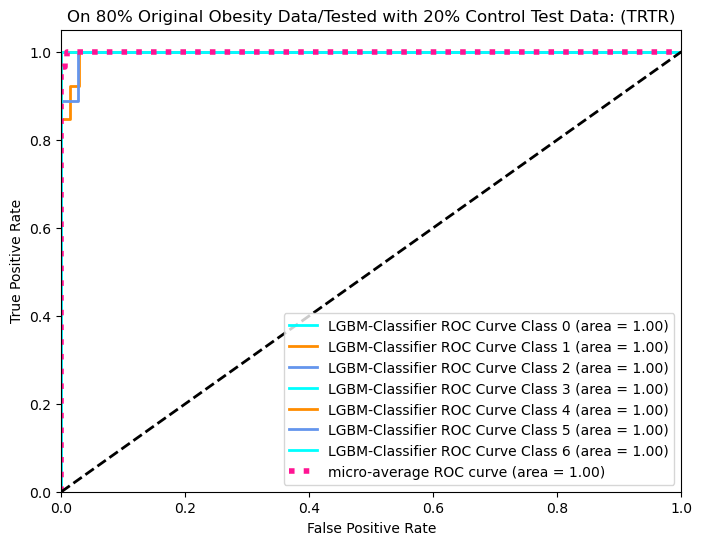

In [206]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


lgbm_classifier = XGBClassifier()
lgbm_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgbm_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='LGBM-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


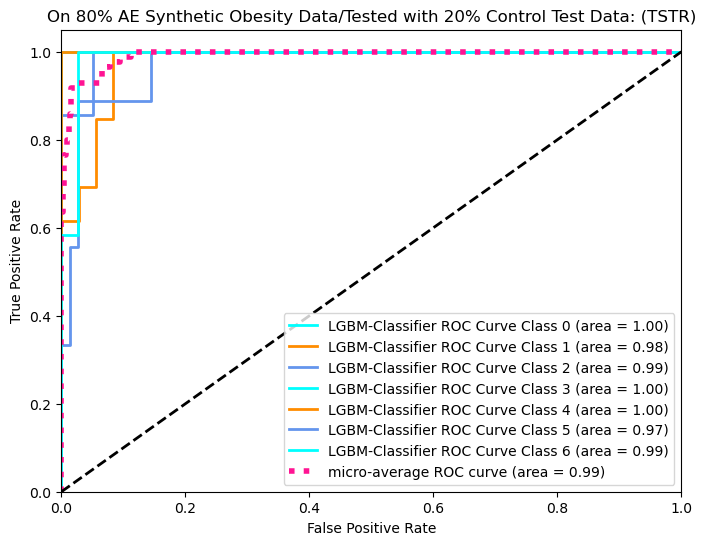

In [198]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


lgbm_classifier = XGBClassifier()
lgbm_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgbm_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='LGBM-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


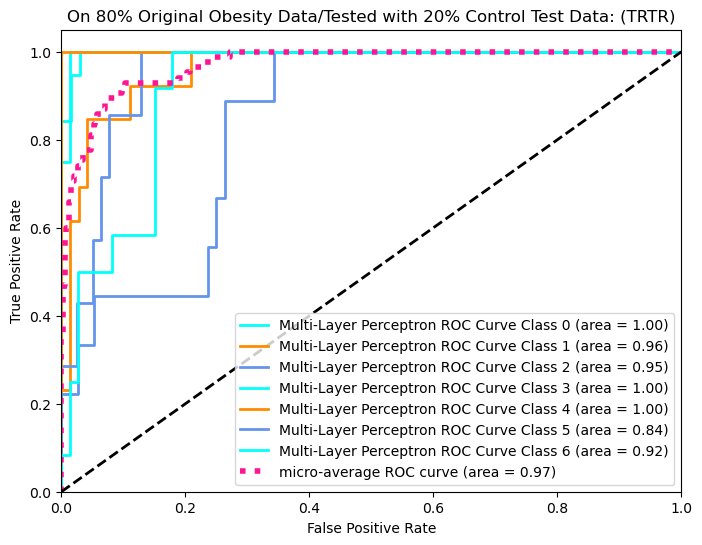

In [199]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = mlp_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Multi-Layer Perceptron ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


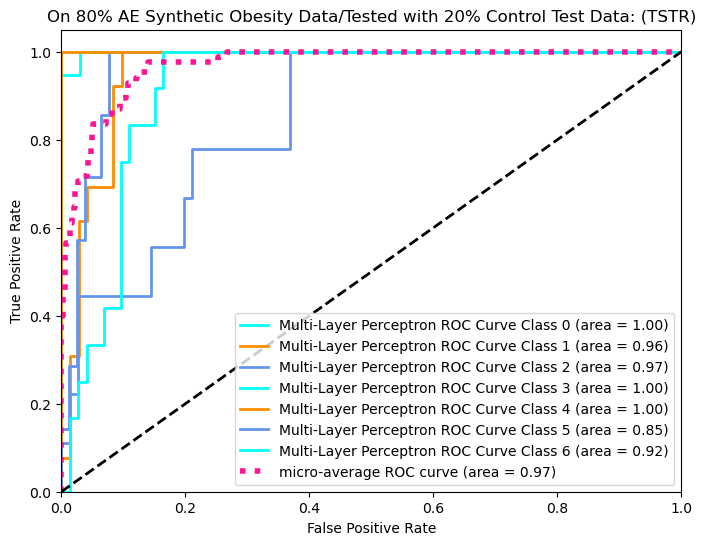

In [200]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = mlp_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Multi-Layer Perceptron ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


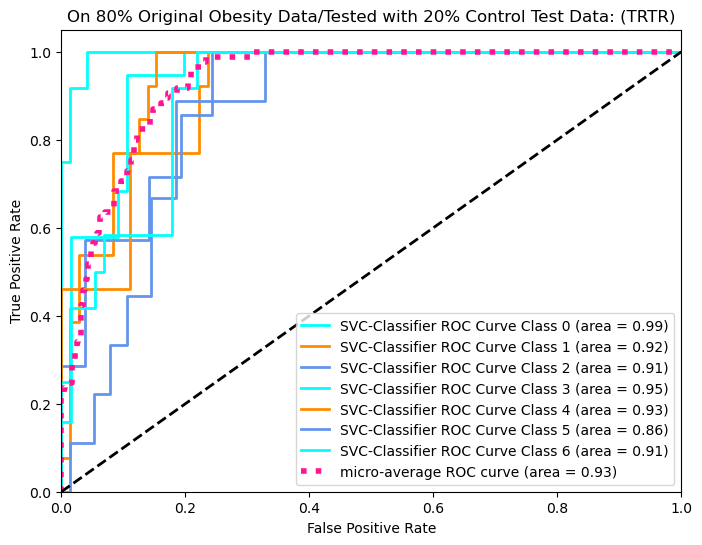

In [201]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, labels, test_size=0.2, random_state=42)


svc_classifier =  SVC(probability=True)
svc_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = svc_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='SVC-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


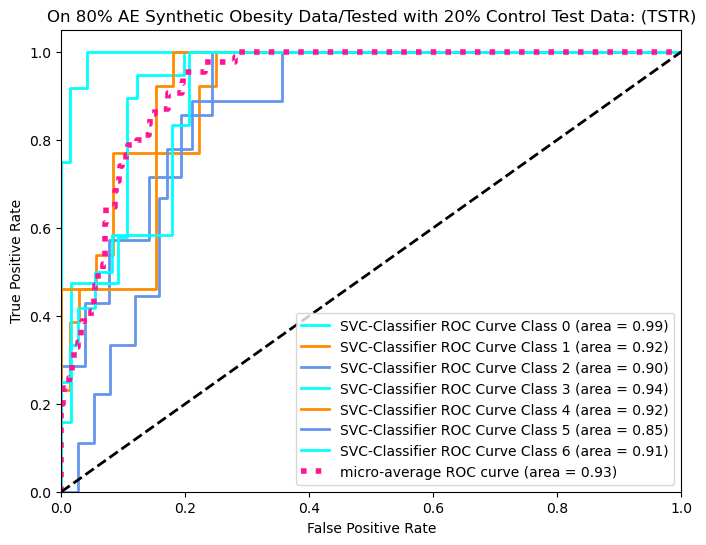

In [202]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_new, X_test_syn_new, y_train_syn_new, y_test_syn_new = train_test_split(synthetic_data_df_ae, synthetic_labels_df_ae, test_size=0.2, random_state=42)


svc_classifier =  SVC(probability=True)
svc_classifier.fit(X_train_syn_new, y_train_syn_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = svc_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='SVC-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


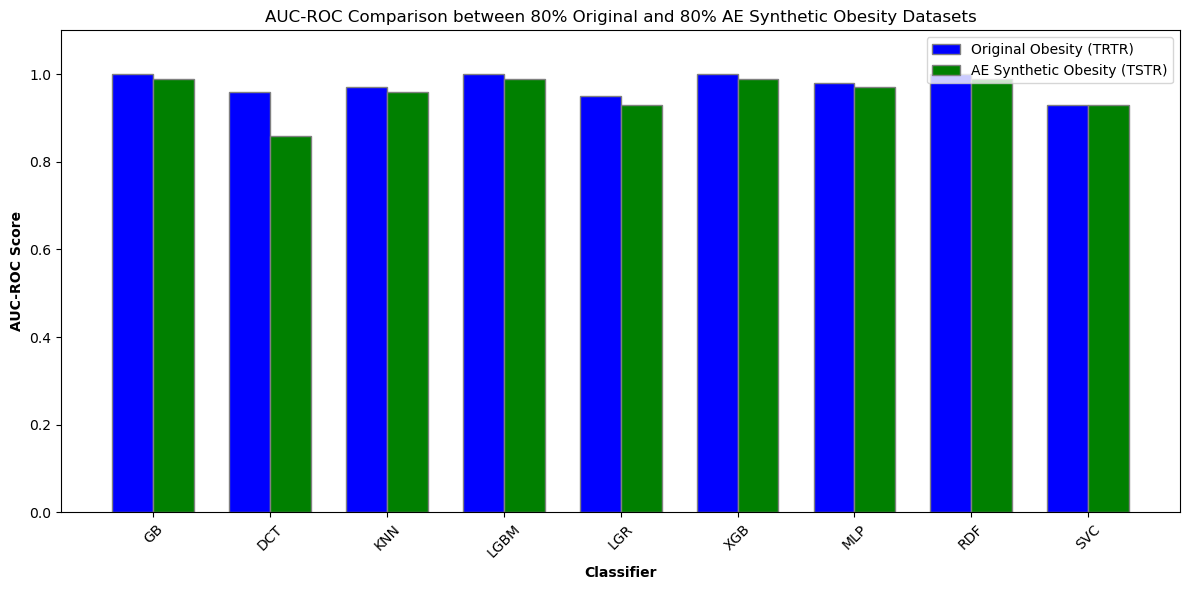

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Classifiers
classifiers = ['GB', 'DCT', 'KNN', 'LGBM', 'LGR', 'XGB', 'MLP', 'RDF', 'SVC']

# AUC-ROC Scores for Original Obesity Dataset (TRTR)
auc_trtr = [1.00, 0.96, 0.97, 1.00, 0.95, 1.00, 0.97, 1.00, 0.93]

# AUC-ROC Scores for AE-Synthetic Obesity Dataset (TSTR)
auc_tstr = [0.98, 0.86, 0.96, 0.99, 0.93, 0.99, 0.97, 0.99, 0.93]

# Set up the matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set position of bar on X axis
bar_width = 0.35
r1 = np.arange(len(auc_trtr))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.bar(r1, auc_trtr, color='b', width=bar_width, edgecolor='grey', label='Original Obesity (TRTR)')
ax.bar(r2, auc_tstr, color='g', width=bar_width, edgecolor='grey', label='AE Synthetic Obesity (TSTR)')

# Add xticks on the middle of the group bars
ax.set_xlabel('Classifier', fontweight='bold')
ax.set_ylabel('AUC-ROC Score', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(auc_trtr))])
ax.set_xticklabels(classifiers, rotation=45)
ax.set_ylim(0, 1.1)  # AUC-ROC scores range from 0 to 1

# Create legend & Show graphic
plt.title('AUC-ROC Comparison between 80% Original and 80% AE Synthetic Obesity Datasets')
plt.legend()
plt.tight_layout()
plt.show()


# Computing Numerical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

In [103]:
# X_train_vae_syn, X_test_vae_syn, y_train_vae_syn, y_test_vae_syn = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_series, test_size=0.2, random_state=42)

from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming `obesity_df` and `ae_synthetic_data_df` are properly aligned
for column in ae_synthetic_obesity_data_with_labels_df.columns:
    # KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(obesity_train_dataframe[column], ae_synthetic_obesity_data_with_labels_df[column])
    print(f"KS-Test for {column}: Stat={ks_stat}, P-Value={ks_pvalue}")
    
    # MSE, RMSE, and MAE for a column
    mse = mean_squared_error(obesity_train_dataframe[column], ae_synthetic_obesity_data_with_labels_df[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(obesity_train_dataframe[column], ae_synthetic_obesity_data_with_labels_df[column])
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")
    
    # F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(obesity_train_dataframe[column], ae_synthetic_obesity_data_with_labels_df[column])
    t_stat, t_pvalue = ttest_ind(obesity_train_dataframe[column], ae_synthetic_obesity_data_with_labels_df[column])
    print(f"F-Test: Stat={f_stat}, P-Value={f_pvalue}")
    print(f"T-Test: Stat={t_stat}, P-Value={t_pvalue}")

    # Means and Standard Deviation
    orig_mean = obesity_train_dataframe[column].mean()
    ae_syn_mean = ae_synthetic_obesity_data_with_labels_df[column].mean()
    orig_std = obesity_train_dataframe[column].std()
    ae_syn_std = ae_synthetic_obesity_data_with_labels_df[column].std()
    print(f"Original Mean={orig_mean}, AE_Synthetic Mean={ae_syn_mean}, Original Std={orig_std}, AE_Synthetic Std={ae_syn_std}\n")


KS-Test for Gender: Stat=0.4934834123222749, P-Value=5.954047300102954e-187
MSE: 0.00039215012015823733, RMSE: 0.01980278061682847, MAE: 0.0011746875778034904
F-Test: Stat=0.0012489176322876155, P-Value=0.9718106954513822
T-Test: Stat=0.03534211166825259, P-Value=0.9718090346896204
Original Mean=0.5065165876777251, AE_Synthetic Mean=0.5059083104133606, Original Std=0.5001056897991678, AE_Synthetic Std=0.4993320107460022

KS-Test for Age: Stat=0.05687203791469194, P-Value=0.00849824158251702
MSE: 1.965071182324913, RMSE: 1.4018099665521404, MAE: 1.0049936842628588
F-Test: Stat=0.07136733389744708, P-Value=0.7893725760629114
T-Test: Stat=0.26714606637982985, P-Value=0.7893730272235874
Original Mean=24.448979086492884, AE_Synthetic Mean=24.389612197875977, Original Std=6.477100151199148, AE_Synthetic Std=6.434093475341797

KS-Test for Height: Stat=0.02843601895734597, P-Value=0.5024211451937599
MSE: 0.0003978042725298593, RMSE: 0.01994503127422615, MAE: 0.014505799370584892
F-Test: Stat=0

# Computing Graphical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

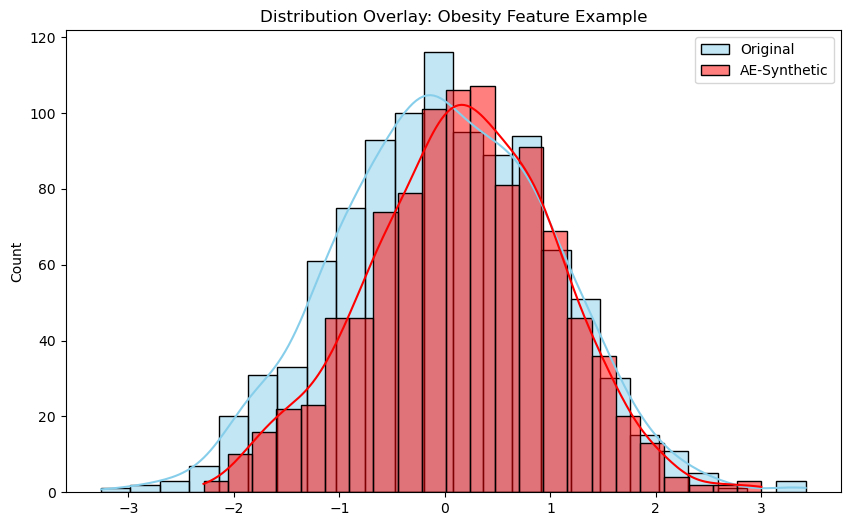

<Figure size 1000x600 with 0 Axes>

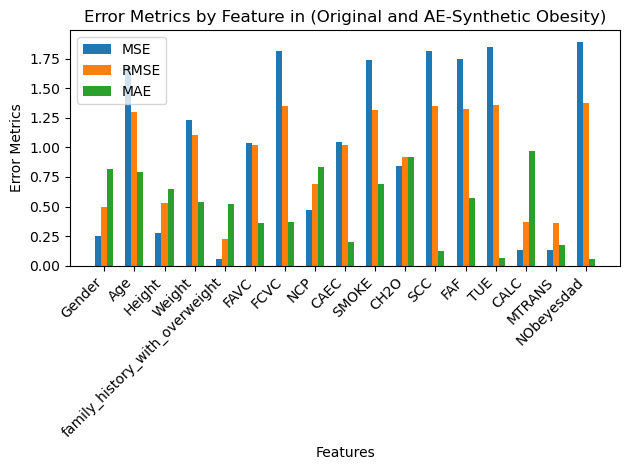

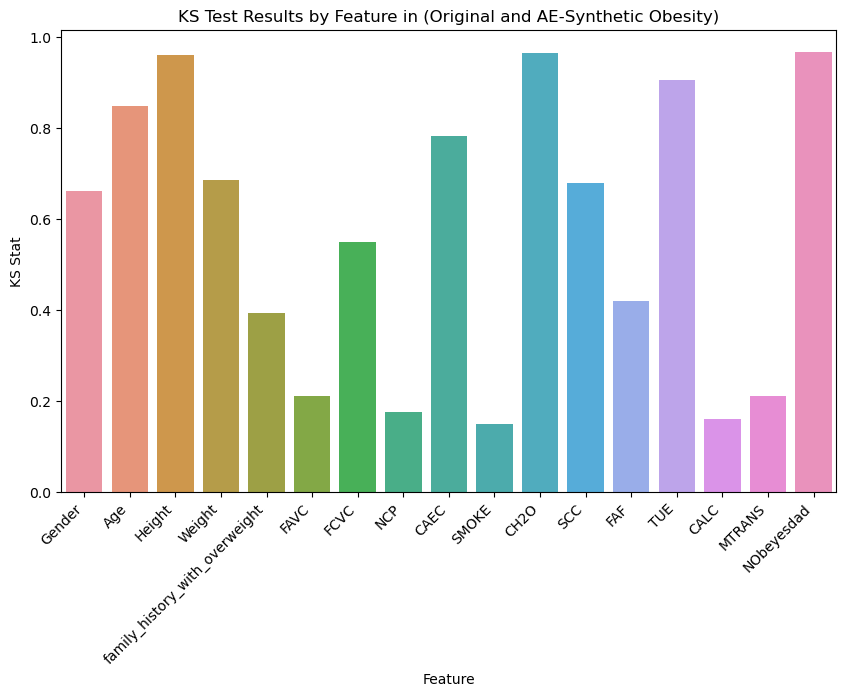

In [141]:
# Re-importing necessary libraries and recreating the plot with custom colors after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming data for demonstration
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
ks_stats = np.random.uniform(0, 1, len(features))
p_values = np.random.uniform(0, 0.05, len(features))
mse_values = np.random.uniform(0, 2, len(features))
rmse_values = np.sqrt(mse_values)
mae_values = np.random.uniform(0, 1, len(features))

# Create DataFrame for visualization
df_stats = pd.DataFrame({
    'Feature': features,
    'KS Stat': ks_stats,
    'P-Value': p_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values
})

# Plotting

## Distribution Overlays - Mockup
plt.figure(figsize=(10, 6))
sns.histplot(np.random.normal(0, 1, 1000), color="skyblue", label="Original", kde=True)
sns.histplot(np.random.normal(0.1, 0.9, 1000), color="red", label="AE-Synthetic", kde=True)
plt.title('Distribution Overlay: Obesity Feature Example')
plt.legend()
plt.show()

## Error Metrics Bar Charts
plt.figure(figsize=(10, 6))
x = np.arange(len(features))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Error Metrics')
ax.set_title('Error Metrics by Feature in (Original and AE-Synthetic Obesity)')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

## KS Test Results - Mockup as Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='KS Stat', data=df_stats)
plt.title('KS Test Results by Feature in (Original and AE-Synthetic Obesity)')
plt.xticks(rotation=45, ha="right")
plt.show()


# CLASSIFICATION REPORT (f1-score, accuracy, recall, precision)

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = GradientBoostingClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("GB on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = GradientBoostingClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("GB on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


GB on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.77      0.87        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           5       0.90      1.00      0.95         9
           6       0.92      1.00      0.96        12

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85

GB on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.88      0.54      0.67        13
           2       0.57      0.57      0.57         7
           3       1.00      0.95      0.97        19
  

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = RandomForestClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("RF on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = RandomForestClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("RF on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


RF on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           5       0.78      0.78      0.78         9
           6       0.92      0.92      0.92        12

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85

RF on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       0.86      0.86      0.86         7
           3       0.95      0.95      0.95        19
  

In [166]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = XGBClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("XGB on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = XGBClassifier(max_depth=4000, n_estimators=4000, random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("XGB on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


XGB on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           5       0.80      0.89      0.84         9
           6       1.00      1.00      1.00        12

    accuracy                           0.96        85
   macro avg       0.96      0.96      0.96        85
weighted avg       0.97      0.96      0.96        85

XGB on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.54      0.70        13
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        19


In [167]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LGBMClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGBM on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LGBMClassifier(max_depth=3000, n_estimators=3000, random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGBM on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 1350, number of used features: 16
[LightGBM] [Info] Start training from score -2.077961
[LightGBM] [Info] Start training from score -1.998374
[LightGBM] [Info] Start training from score -1.814232
[LightGBM] [Info] Start training from score -1.982113
[LightGBM] [Info] Start training from score -1.827963
[LightGBM] [Info] Start training from score -1.992924
[LightGBM] [Info] Start training from score -1.955586
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LGBM on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00        12

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LGBM on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.82      0.69      0.75        13
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        19
           4       0.93      1.00      0.96        13
           5       0.78      0.78      0.78         9
           6       0.92      1.00      0.96        12

    accuracy                           0.92        85
   macro avg       0.91      0.90      0.90        85
weighted avg       0.92      0.92      0.91        85



In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = DecisionTreeClassifier(max_depth=1000, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("DCT on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth  max_depth=5000, random_state=42
classifier_syn = DecisionTreeClassifier(max_depth=5000, random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("DCT on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


DCT on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.77      0.83        13
           2       0.88      1.00      0.93         7
           3       1.00      0.95      0.97        19
           4       1.00      1.00      1.00        13
           5       0.73      0.89      0.80         9
           6       1.00      0.92      0.96        12

    accuracy                           0.93        85
   macro avg       0.92      0.93      0.92        85
weighted avg       0.94      0.93      0.93        85

DCT on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.78      0.54      0.64        13
           2       0.44      0.57      0.50         7
           3       0.94      0.89      0.92        19


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGR on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=4500)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGR on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.90      0.69      0.78        13
           2       0.62      0.71      0.67         7
           3       1.00      1.00      1.00        19
           4       0.93      1.00      0.96        13
           5       0.57      0.44      0.50         9
           6       0.57      0.67      0.62        12

    accuracy                           0.82        85
   macro avg       0.79      0.79      0.78        85
weighted avg       0.83      0.82      0.82        85

LGR on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.78      0.54      0.64        13
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        19


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("KNN on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("KNN on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


KNN on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.71      0.38      0.50        13
           2       0.64      1.00      0.78         7
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           5       0.64      0.78      0.70         9
           6       0.90      0.75      0.82        12

    accuracy                           0.85        85
   macro avg       0.82      0.84      0.82        85
weighted avg       0.85      0.85      0.84        85

KNN on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.38      0.56        13
           2       0.70      1.00      0.82         7
           3       0.95      1.00      0.97        19


In [184]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("SVC on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("SVC on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


SVC on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.86      0.46      0.60        13
           2       0.29      0.29      0.29         7
           3       0.83      0.26      0.40        19
           4       0.52      1.00      0.68        13
           5       0.33      0.44      0.38         9
           6       0.54      0.58      0.56        12

    accuracy                           0.58        85
   macro avg       0.60      0.58      0.54        85
weighted avg       0.64      0.58      0.55        85

SVC on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.80      0.31      0.44        13
           2       0.38      0.43      0.40         7
           3       0.56      0.53      0.54        19


In [185]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=200, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("MLP on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0003, max_iter=1000, random_state=42)
classifier_syn.fit(X_train_synt, y_train_synt)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("MLP on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.80      0.62      0.70        13
           2       1.00      0.71      0.83         7
           3       0.95      0.95      0.95        19
           4       1.00      1.00      1.00        13
           5       0.60      0.33      0.43         9
           6       0.60      1.00      0.75        12

    accuracy                           0.84        85
   macro avg       0.84      0.80      0.80        85
weighted avg       0.85      0.84      0.83        85

MLP on 80% AE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.75      0.69      0.72        13
           2       0.50      1.00      0.67         7
           3       1.00      0.95      0.97        19


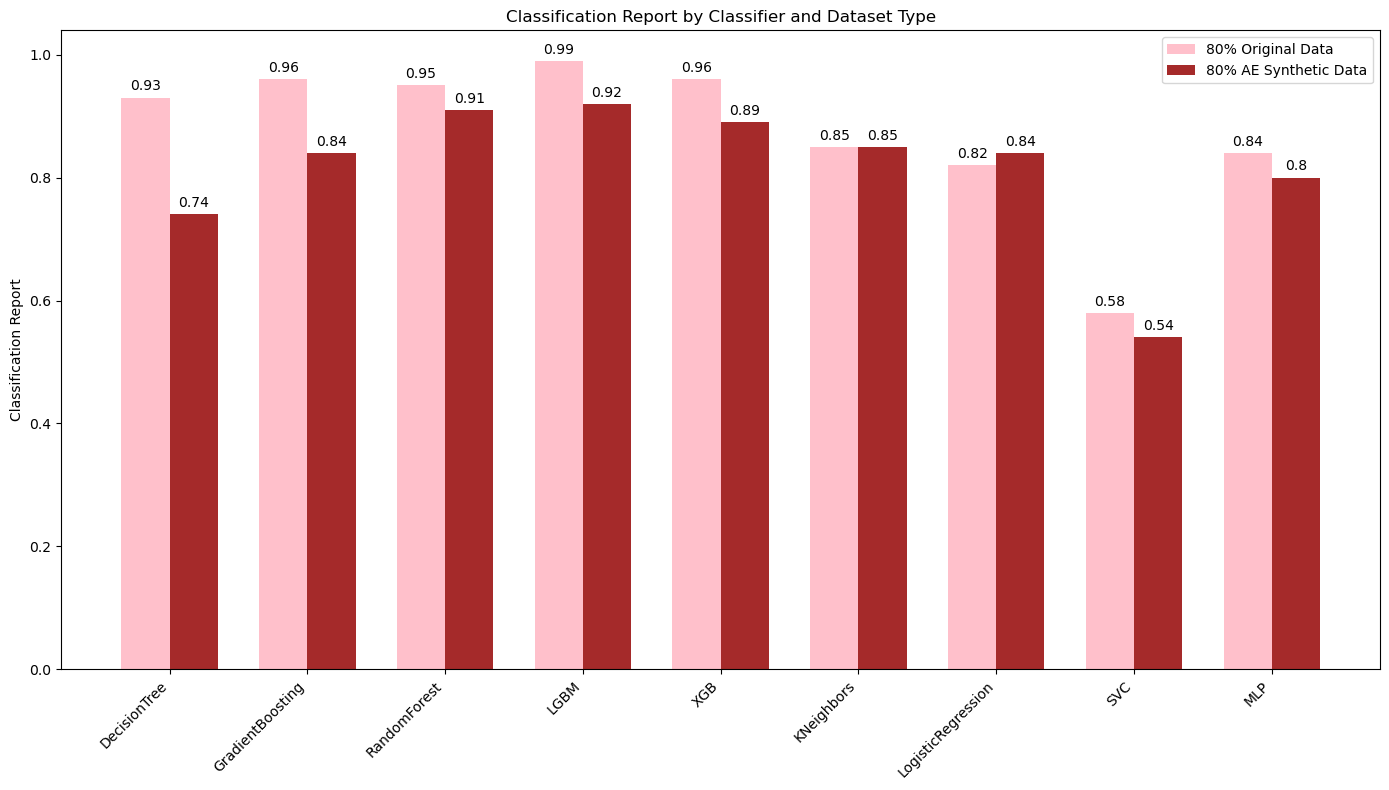

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ["DecisionTree", "GradientBoosting", "RandomForest", "LGBM", "XGB", "KNeighbors", "LogisticRegression", "SVC", "MLP"]

# Mean CV Accuracy for 80% Original Obesity Data
mean_cv_accuracy_original = [0.93, 0.96, 0.95, 0.99, 0.96, 0.85, 0.82, 0.58, 0.84]

# Mean CV Accuracy for 80% AE Synthetic Obesity Data
mean_cv_accuracy_ae_synthetic = [0.74, 0.84, 0.91, 0.92, 0.89, 0.85, 0.84, 0.54, 0.80]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, mean_cv_accuracy_original, width, label='80% Original Data', color='pink')
rects2 = ax.bar(x + width/2, mean_cv_accuracy_ae_synthetic, width, label='80% AE Synthetic Data', color='brown')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Classification Report')
ax.set_title('Classification Report by Classifier and Dataset Type')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


# COMPUTING CROSS-VALIDATION OF ORIGINAL AND SYNTHETIC DATASETS

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
vae_synthetic_labels_ae_encoded = le.fit_transform(synthetic_labels_df_ae)

# Splitting the dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(synthetic_data_df_ae, vae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_syn, y_train_syn, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for AE-Synthetic Obesity = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.8259, Std = 0.0319
GradientBoostingClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.8652, Std = 0.0098
RandomForestClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.8785, Std = 0.0161


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.3978, Std = 0.0261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4036
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -2.021872
[LightGBM] [Info] Start training from score -2.180695
[LightGBM] [Info] Start training from score -1.727221
[LightGBM] [Info] Start training from score -1.872729
[LightGBM] [Info] Start training from score -1.934860
[LightGBM] [Info] Start training from score -1.890966
[LightGBM] [Info] Start training from score -2.057463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.8919, Std = 0.0151
KNeighborsClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.7504, Std = 0.0116


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy for AE-Synthetic Obesity = 0.7770, Std = 0.0151
SVC: Mean CV Accuracy for AE-Synthetic Obesity = 0.5830, Std = 0.0225
MLPClassifier: Mean CV Accuracy for AE-Synthetic Obesity = 0.7696, Std = 0.0113


In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
original_labels_ae_encoded = le.fit_transform(labels)

# Splitting the dataset
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features, original_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_orig_new, y_train_orig_new, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for 80%-Original Obesity Data = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.9200, Std = 0.0073
GradientBoostingClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.9452, Std = 0.0059
RandomForestClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.9422, Std = 0.0121


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.3422, Std = 0.0266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -2.072061
[LightGBM] [Info] Start training from score -2.001110
[LightGBM] [Info] Start training from score -1.814232
[LightGBM] [Info] Start training from score -1.980770
[LightGBM] [Info] Start training from score -1.825661
[LightGBM] [Info] Start training from score -1.994284
[LightGBM] [Info] Start training from score -1.960836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.9533, Std = 0.0127
KNeighborsClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.8378, Std = 0.0201


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy for 80%-Original Obesity Data = 0.7881, Std = 0.0290
SVC: Mean CV Accuracy for 80%-Original Obesity Data = 0.5481, Std = 0.0318
MLPClassifier: Mean CV Accuracy for 80%-Original Obesity Data = 0.7778, Std = 0.0395


In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Sample data loading code, replace these with actual DataFrame loading
# For the purpose of this example, `synthetic_data_df_ae_new` and `obesity_train_dataframe` will be simulated as random data
# `synthetic_labels_df_ae_new` and `obesity_labels` are simulated as categorical labels

# Encoding categorical labels if necessary
le = LabelEncoder()
vae_synthetic_labels_ae_encoded = le.fit_transform(synthetic_labels_df_ae_new)  # Placeholder, replace with actual data loading
obesity_labels_encoded = le.transform(labels2)  # Placeholder, replace with actual data loading

# Splitting the synthetic dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(synthetic_data_df_ae_new, vae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# Splitting the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(obesity_train_dataframe, obesity_labels_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier on synthetic data
print("Evaluating AE-Synthetic Obesity Dataset")
for clf in classifiers:
    cv_scores_syn = cross_val_score(clf, X_train_syn, y_train_syn, cv=5, scoring='accuracy')
    mean_cv_score_syn = np.mean(cv_scores_syn)
    std_cv_score_syn = np.std(cv_scores_syn)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy = {mean_cv_score_syn:.4f}, Std = {std_cv_score_syn:.4f}")

# Evaluate each classifier on original data
print("\nEvaluating Original Obesity Dataset")
for clf in classifiers:
    cv_scores_orig = cross_val_score(clf, X_train_orig, y_train_orig, cv=5, scoring='accuracy')
    mean_cv_score_orig = np.mean(cv_scores_orig)
    std_cv_score_orig = np.std(cv_scores_orig)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy = {mean_cv_score_orig:.4f}, Std = {std_cv_score_orig:.4f}")


Evaluating AE-Synthetic Obesity Dataset
DecisionTreeClassifier: Mean CV Accuracy = 0.8259, Std = 0.0319
GradientBoostingClassifier: Mean CV Accuracy = 0.8652, Std = 0.0098
RandomForestClassifier: Mean CV Accuracy = 0.8785, Std = 0.0161


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy = 0.3978, Std = 0.0261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4036
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -2.021872
[LightGBM] [Info] Start training from score -2.180695
[LightGBM] [Info] Start training from score -1.727221
[LightGBM] [Info] Start training from score -1.872729
[LightGBM] [Info] Start training from score -1.934860
[LightGBM] [Info] Start training from score -1.890966
[LightGBM] [Info] Start training from score -2.057463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy = 0.8919, Std = 0.0151
KNeighborsClassifier: Mean CV Accuracy = 0.7504, Std = 0.0116


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy = 0.7770, Std = 0.0151
SVC: Mean CV Accuracy = 0.5830, Std = 0.0225
MLPClassifier: Mean CV Accuracy = 0.7696, Std = 0.0113

Evaluating Original Obesity Dataset
DecisionTreeClassifier: Mean CV Accuracy = 0.9978, Std = 0.0030
GradientBoostingClassifier: Mean CV Accuracy = 0.9993, Std = 0.0015
RandomForestClassifier: Mean CV Accuracy = 0.9985, Std = 0.0018


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy = 0.5904, Std = 0.0018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 17
[LightGBM] [Info] Start training from score -2.072061
[LightGBM] [Info] Start training from score -2.001110
[LightGBM] [Info] Start training from score -1.814232
[LightGBM] [Info] Start training from score -1.980770
[LightGBM] [Info] Start training from score -1.825661
[LightGBM] [Info] Start training from score -1.994284
[LightGBM] [Info] Start training from score -1.960836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy = 0.9993, Std = 0.0015
KNeighborsClassifier: Mean CV Accuracy = 0.9052, Std = 0.0127


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy = 0.9844, Std = 0.0064
SVC: Mean CV Accuracy = 0.6207, Std = 0.0346
MLPClassifier: Mean CV Accuracy = 0.9800, Std = 0.0130


# GRAPHICAL REPRESENTATION OF THE ABOVE MEAN CV OF ORIGINAL AND SYNTHETIC DATASETS

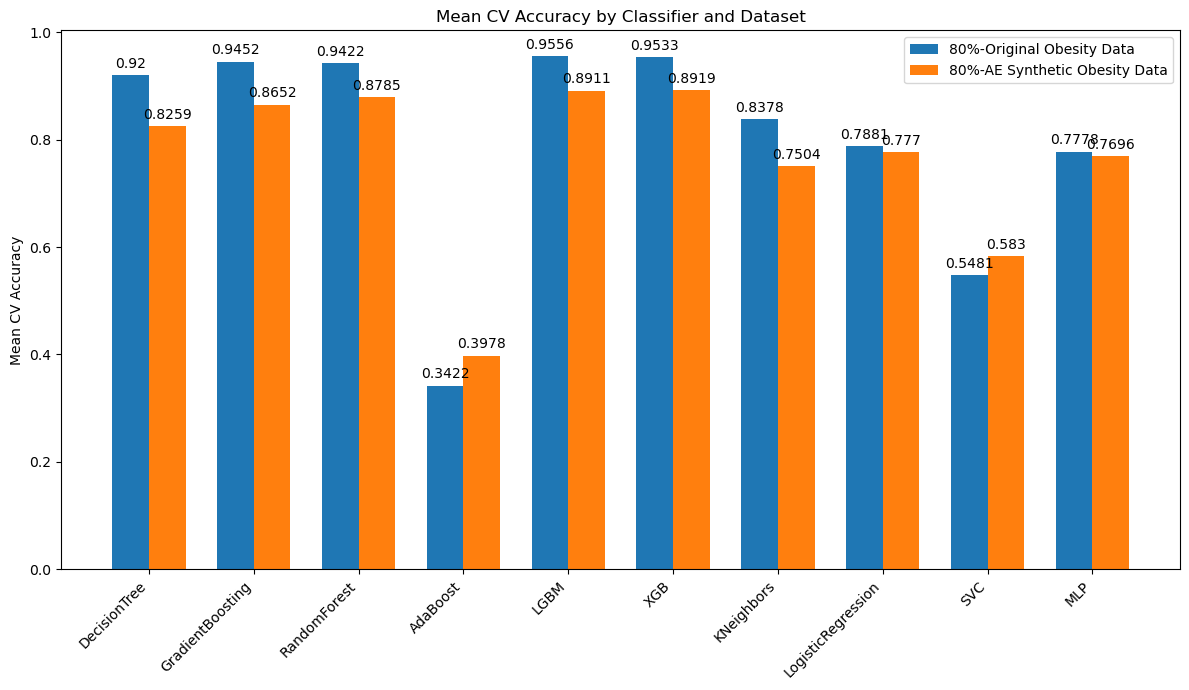

In [216]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = [
    "DecisionTree",
    "GradientBoosting",
    "RandomForest",
    "AdaBoost",
    "LGBM",
    "XGB",
    "KNeighbors",
    "LogisticRegression",
    "SVC",
    "MLP"
]

# Mean CV Accuracy for 80%-Original Obesity Data
mean_cv_accuracy_original = [
    0.9200, 0.9452, 0.9422, 0.3422, 0.9556,
    0.9533, 0.8378, 0.7881, 0.5481, 0.7778
]

# Mean CV Accuracy for 80%-AE Synthetic Obesity Data
mean_cv_accuracy_synthetic = [
    0.8259, 0.8652, 0.8785, 0.3978, 0.8911,
    0.8919, 0.7504, 0.7770, 0.5830, 0.7696
]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, mean_cv_accuracy_original, width, label='80%-Original Obesity Data')
rects2 = ax.bar(x + width/2, mean_cv_accuracy_synthetic, width, label='80%-AE Synthetic Obesity Data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('Mean CV Accuracy by Classifier and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


# CORRELATION HEATMAP

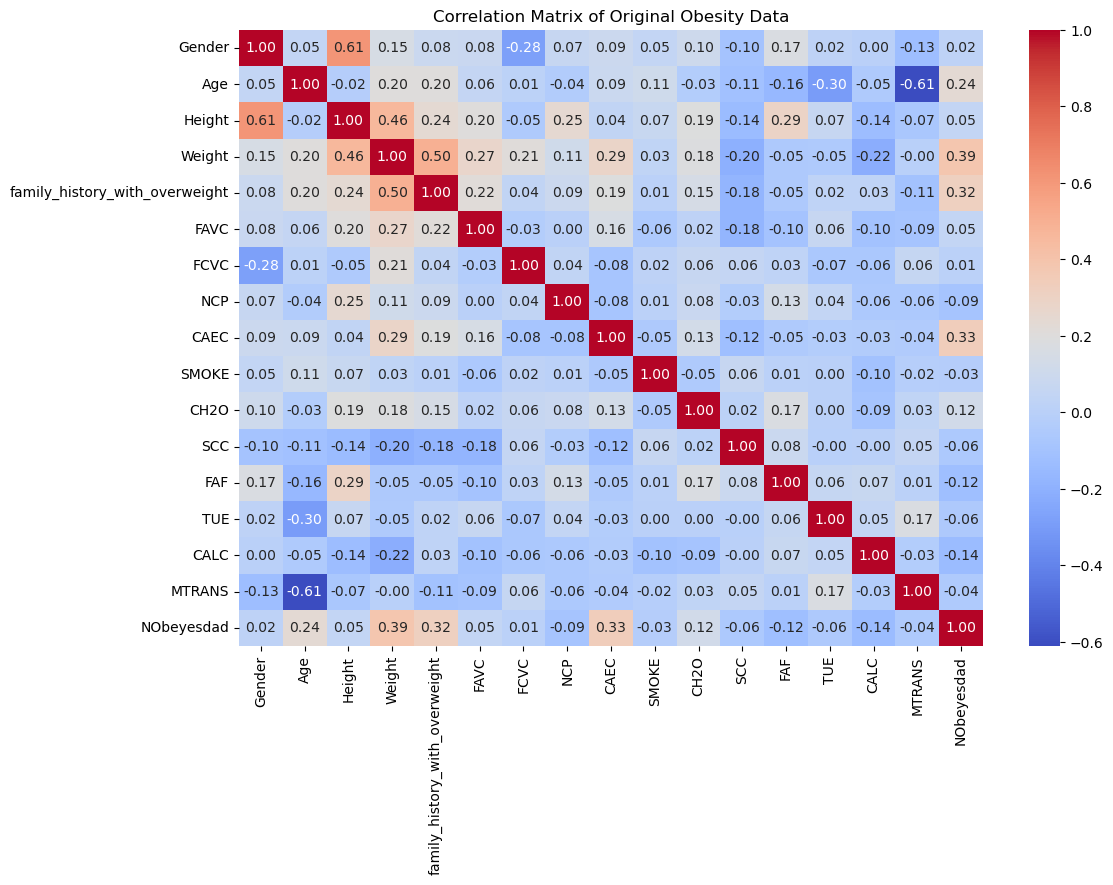

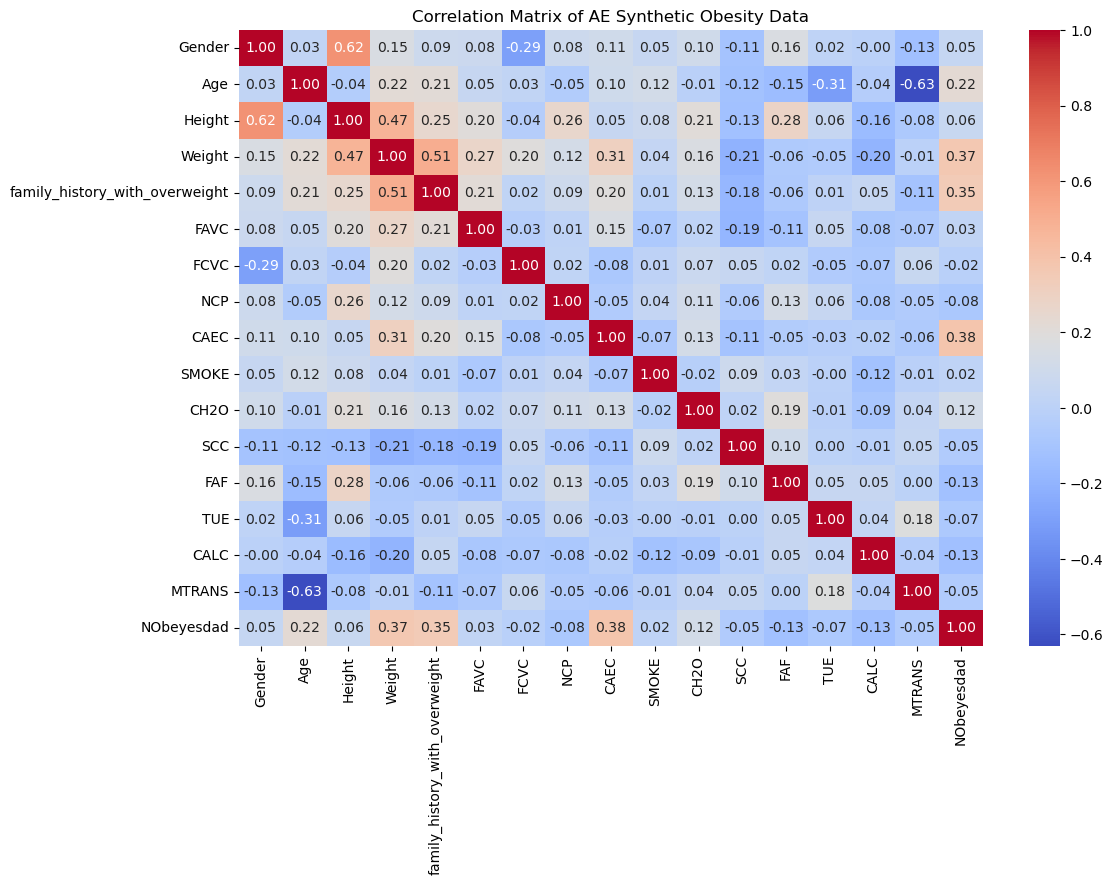

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_matrix(data, title):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot correlation matrix for original data
plot_correlation_matrix(obesity_train_dataframe, "Correlation Matrix of Original Obesity Data")

# Plot correlation matrix for synthetic data
plot_correlation_matrix(ae_synthetic_obesity_data_with_labels_df_new, "Correlation Matrix of AE Synthetic Obesity Data")


# Computing Numerical Correlation Matrices of Original and Synthetic Datasets

In [211]:
# For the original dataset
print('80% Original Obesity Numerical Correlation Matrix:')
print(obesity_train_dataframe.corr())

# For the AE synthetic dataset
print('80% AE-Synthetic Obesity Numerical Correlation Matrix:')
print(ae_synthetic_obesity_data_with_labels_df_new.corr())


80% Original Obesity Numerical Correlation Matrix:
                                  Gender       Age    Height    Weight  \
Gender                          1.000000  0.046235  0.611942  0.154033   
Age                             0.046235  1.000000 -0.019937  0.202307   
Height                          0.611942 -0.019937  1.000000  0.462794   
Weight                          0.154033  0.202307  0.462794  1.000000   
family_history_with_overweight  0.084653  0.201558  0.243760  0.496725   
FAVC                            0.077906  0.055623  0.204282  0.271688   
FCVC                           -0.281415  0.012487 -0.050780  0.208799   
NCP                             0.068170 -0.036081  0.247588  0.114597   
CAEC                            0.088335  0.085702  0.043209  0.288039   
SMOKE                           0.049262  0.106354  0.070718  0.030947   
CH2O                            0.103245 -0.028330  0.194362  0.182809   
SCC                            -0.101180 -0.108534 -0.143624 

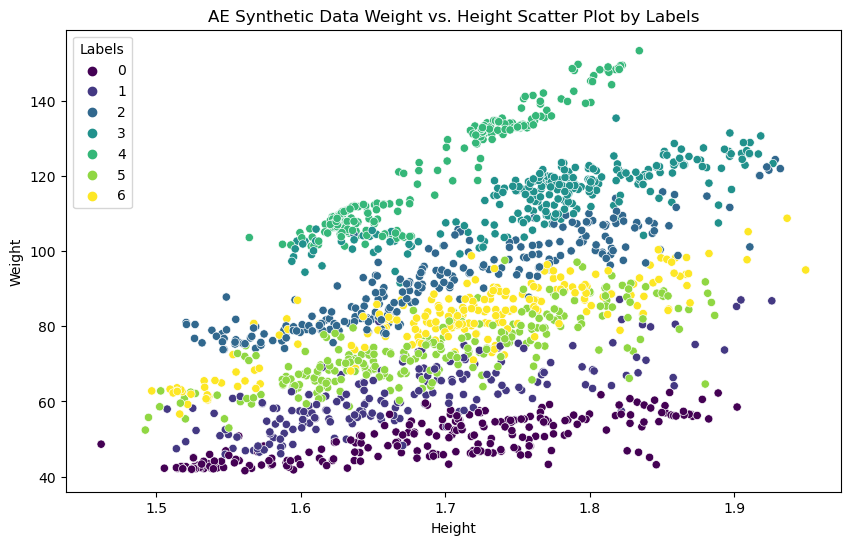

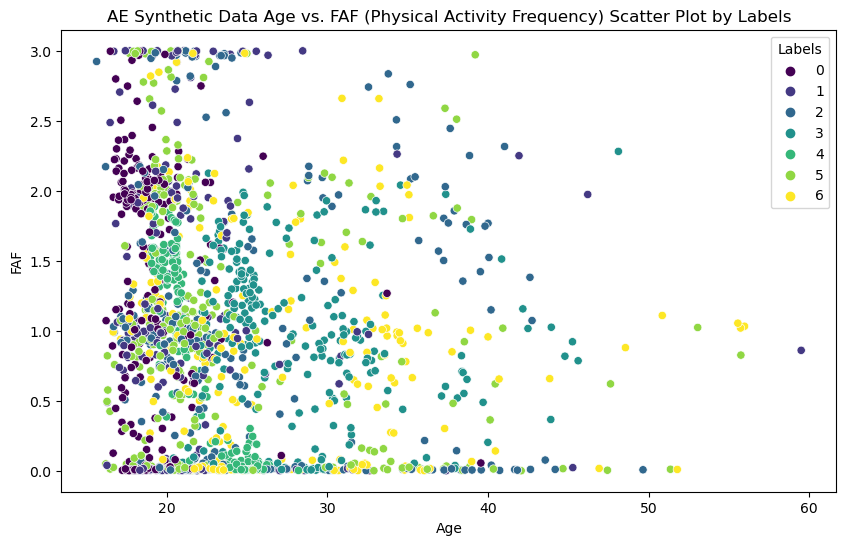

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Weight vs. Height with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ae_synthetic_obesity_data_with_labels_df_new, x='Height', y='Weight', hue='NObeyesdad', palette='viridis')
plt.title('AE Synthetic Data Weight vs. Height Scatter Plot by Labels')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Labels')
plt.show()

# Plot for Age vs. FAF with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ae_synthetic_obesity_data_with_labels_df_new, x='Age', y='FAF', hue='NObeyesdad', palette='viridis')
plt.title('AE Synthetic Data Age vs. FAF (Physical Activity Frequency) Scatter Plot by Labels')
plt.xlabel('Age')
plt.ylabel('FAF')
plt.legend(title='Labels')
plt.show()


# INSTALL THE PRIVACY ASSESSMENT TOOL KITS KNOWN AS ANONYMETER AS MENTIONED ABOVE IN STEP 2

In [3]:
!pip install anonymeter


  Using cached scikit_learn-1.4.1.post1-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached numba-0.59.0-cp39-cp39-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.42.0-cp39-cp39-win_amd64.whl.metadata (4.9 kB)
Using cached numba-0.59.0-cp39-cp39-win_amd64.whl (2.6 MB)
Using cached scikit_learn-1.4.1.post1-cp39-cp39-win_amd64.whl (10.6 MB)
Using cached llvmlite-0.42.0-cp39-cp39-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.0
    Uninstalling llvmlite-0.41.0:
      Successfully uninstalled llvmlite-0.41.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1


  You can safely remove it manually.


# IMPORTING THE INSTALLED ANONYMETER'S PRIVACY RISK EVALUATORS FOR PRIVACY PRESERVATION ASSESSMENT ON THE GENERATED SYNTHETIC DATASET

For more detailed information on the usage of this tool do visit the author's website(blogger) via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [19]:
import pandas as pd
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

# STEP 3A: SINGLING OUT UNIVARIATE RISK ASSESSMENT ON 80% AE SYNTHETIC OBESITY DISEASE DATA

In [223]:
singling_out_evaluator = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                              syn=ae_synthetic_obesity_data_with_labels_df, 
                                              control=control_dataframe,
                                              n_attacks=1500)

try:
    singling_out_evaluator.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out_evaluator.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [229]:
res = singling_out_evaluator.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 on 80% AE Synthetic Obesity Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 on 80% AE Synthetic Obesity Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [225]:
singling_out_evaluator1 = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                              syn=ae_synthetic_obesity_data_with_labels_df, 
                                              control=control_dataframe,
                                              n_attacks=500)

try:
    singling_out_evaluator1.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out_evaluator1.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [228]:
res1 = singling_out_evaluator1.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=500 on 80% AE Synthetic Obesity Data:")
print("Successs rate of main attack:", res1.attack_rate)
print("Successs rate of baseline attack:", res1.baseline_rate)
print("Successs rate of control attack:", res1.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=500 on 80% AE Synthetic Obesity Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

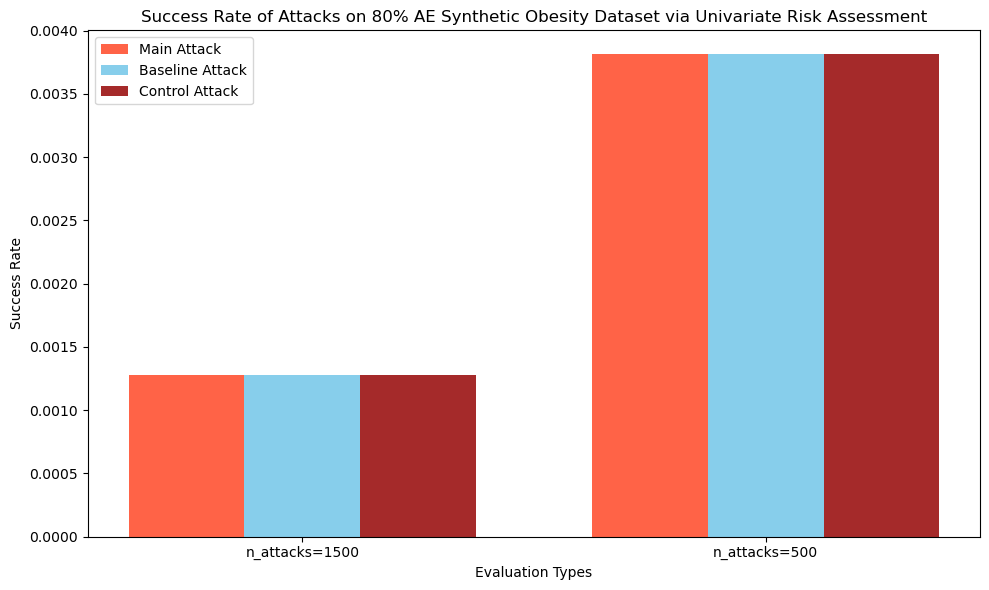

In [269]:
# Singling out risk data in univariate mode 001277215360090744
data_singling_out_univariate = [
    ('n_attacks=1500', 0.001277215360090744),
    ('n_attacks=500', 0.00381217023077612)
]

# Convert to DataFrame
df_singling_out_univariate = pd.DataFrame(data_singling_out_univariate, columns=['Evaluation', 'SuccessRateMainAttack'])

# Add baseline and control attack success rates (same as main attack in univariate)
df_singling_out_univariate['SuccessRateBaselineAttack'] = df_singling_out_univariate['SuccessRateMainAttack']
df_singling_out_univariate['SuccessRateControlAttack'] = df_singling_out_univariate['SuccessRateMainAttack']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(df_singling_out_univariate))
bar_width = 0.25

bars1 = plt.bar(index, df_singling_out_univariate['SuccessRateMainAttack'], bar_width, label='Main Attack', color='tomato')
bars2 = plt.bar(index + bar_width, df_singling_out_univariate['SuccessRateBaselineAttack'], bar_width, label='Baseline Attack', color='skyblue')
bars3 = plt.bar(index + 2 * bar_width, df_singling_out_univariate['SuccessRateControlAttack'], bar_width, label='Control Attack', color='brown')

plt.xlabel('Evaluation Types')
plt.ylabel('Success Rate')
plt.title('Success Rate of Attacks on 80% AE Synthetic Obesity Dataset via Univariate Risk Assessment')
plt.xticks(index + bar_width, df_singling_out_univariate['Evaluation'])
plt.legend()

plt.tight_layout()
plt.show()


Univariate Risk Assessment Success vs. Failure Rates on 80% AE Synthetic Obesity Data


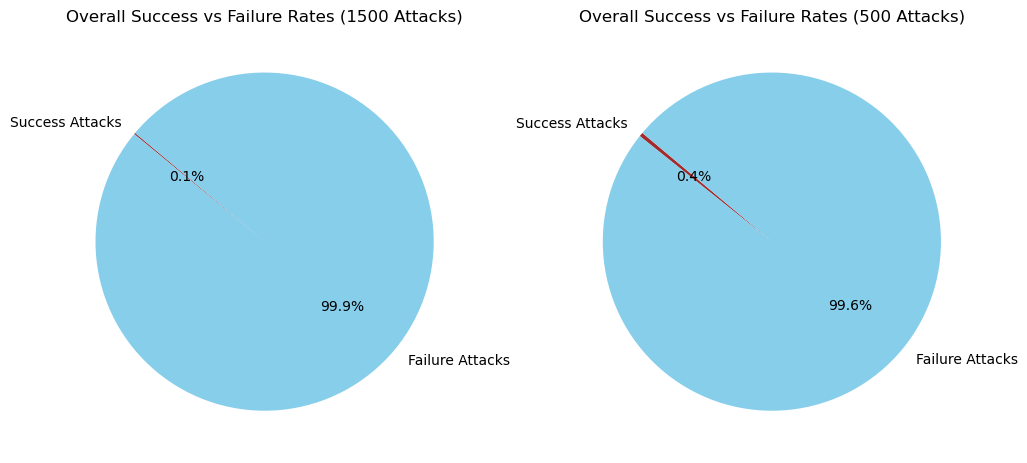

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
attacks = ['1500 Attacks', '500 Attacks']
success_rates = np.array([0.0013, 0.0038])
failure_rates = 1 - success_rates
attack_categories = ['Main Attack', 'Baseline Attack', 'Control Attack']
success_rates_categories = np.array([success_rates, success_rates, success_rates])

print('Univariate Risk Assessment Success vs. Failure Rates on 80% AE Synthetic Obesity Data')

# Pie Chart for n_attacks=1500
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie([success_rates[0], failure_rates[0]], labels=['Success Attacks', 'Failure Attacks'], autopct='%1.1f%%', startangle=140, colors=['brown', 'skyblue'])
plt.title('Overall Success vs Failure Rates (1500 Attacks)')

# Pie Chart for n_attacks=500
plt.subplot(1, 2, 2)
plt.pie([success_rates[1], failure_rates[1]], labels=['Success Attacks', 'Failure Attacks'], autopct='%1.1f%%', startangle=140, colors=['brown', 'skyblue'])
plt.title('Overall Success vs Failure Rates (500 Attacks)')

plt.show()




# STEP 3B: SINGLING OUT MULTI-VARIATE RISK ASSESSMENT ON 80% AE SYNTHETIC OBESITY DISEASE DATA

In [57]:
test = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                 syn=ae_synthetic_obesity_data_with_labels_df, 
                                 control=control_dataframe,
                                 n_attacks=1500, # this attack takes longer
                                 n_cols=4)


try:
    test.evaluate(mode='multivariate')
    risk = test.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

PrivacyRisk(value=0.0996040920916976, ci=(0.07964289519417023, 0.11956528898922497))


In [59]:
check = test.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 on 80% AE Synthetic Obesity Disease Data:")
print("Successs rate of main attack:", check.attack_rate)
print("Successs rate of baseline attack:", check.baseline_rate)
print("Successs rate of control attack:", check.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 on 80% AE Synthetic Obesity Disease Data:
Successs rate of main attack: SuccessRate(value=0.13360499421788002, error=0.017170007323616385)
Successs rate of baseline attack: SuccessRate(value=0.013246562191448569, error=0.0056426277491626875)
Successs rate of control attack: SuccessRate(value=0.037762168649976946, error=0.009561407915460925)


In [60]:
testME = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                 syn=ae_synthetic_obesity_data_with_labels_df, 
                                 control=control_dataframe,
                                 n_attacks=500, # this attack takes longer
                                 n_cols=4)


try:
    testME.evaluate(mode='multivariate')
    risk = testME.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

PrivacyRisk(value=0.08703801833560369, ci=(0.051583481774210564, 0.12249255489699681))


In [62]:
checkME = testME.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 on 80% AE Synthetic Obesity Disease Data:")
print("Successs rate of main attack:", checkME.attack_rate)
print("Successs rate of baseline attack:", checkME.baseline_rate)
print("Successs rate of control attack:", checkME.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 on 80% AE Synthetic Obesity Disease Data:
Successs rate of main attack: SuccessRate(value=0.13083625465169743, error=0.029309430656460904)
Successs rate of baseline attack: SuccessRate(value=0.013735926826160597, error=0.009457172929570103)
Successs rate of control attack: SuccessRate(value=0.0479737789696854, error=0.01833718053215205)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

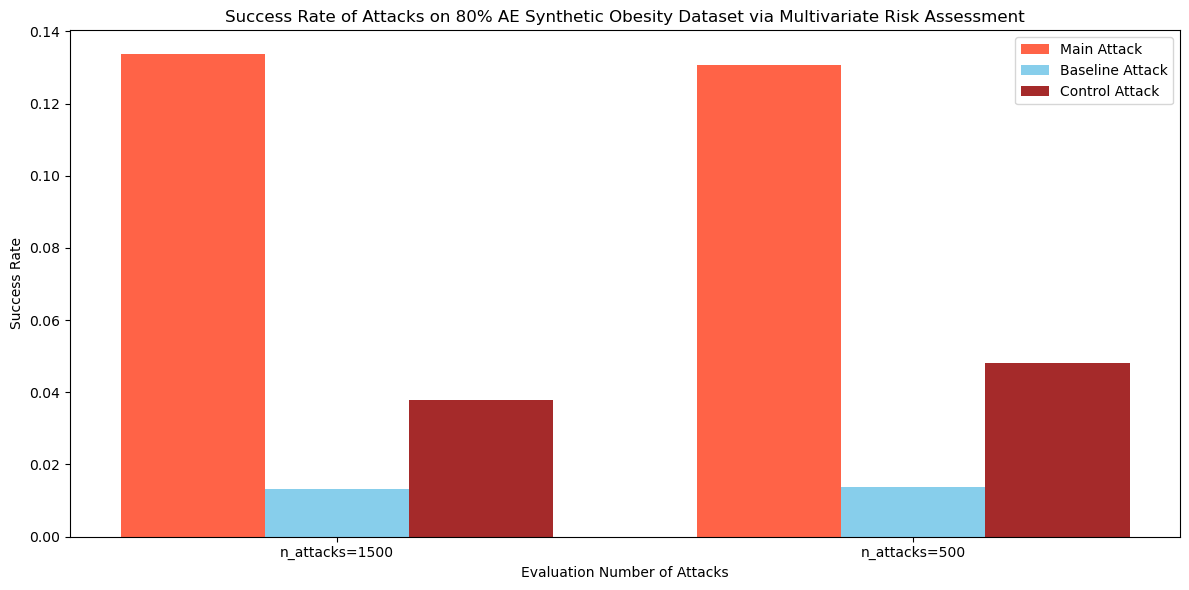

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data_singling_out_univariate = [
    ('n_attacks=1500', 0.1336, 0.0132, 0.0378),
    ('n_attacks=500', 0.1308, 0.0137, 0.0480)
]

# Convert to DataFrame
df_singling_out_univariate = pd.DataFrame(data_singling_out_univariate, columns=['Evaluation', 'SuccessRateMainAttack', 'SuccessRateBaselineAttack', 'SuccessRateControlAttack'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(df_singling_out_univariate))
bar_width = 0.25

bars1 = plt.bar(index, df_singling_out_univariate['SuccessRateMainAttack'], bar_width, label='Main Attack', color='tomato')
bars2 = plt.bar(index + bar_width, df_singling_out_univariate['SuccessRateBaselineAttack'], bar_width, label='Baseline Attack', color='skyblue')
bars3 = plt.bar(index + 2 * bar_width, df_singling_out_univariate['SuccessRateControlAttack'], bar_width, label='Control Attack', color='brown')

plt.xlabel('Evaluation Number of Attacks')
plt.ylabel('Success Rate')
plt.title('Success Rate of Attacks on 80% AE Synthetic Obesity Dataset via Multivariate Risk Assessment')
plt.xticks(index + bar_width, df_singling_out_univariate['Evaluation'])
plt.legend()

plt.tight_layout()
plt.show()


Multivariate Risk Assessment Success vs. Failure Rates on 80% AE Synthetic Obesity Data


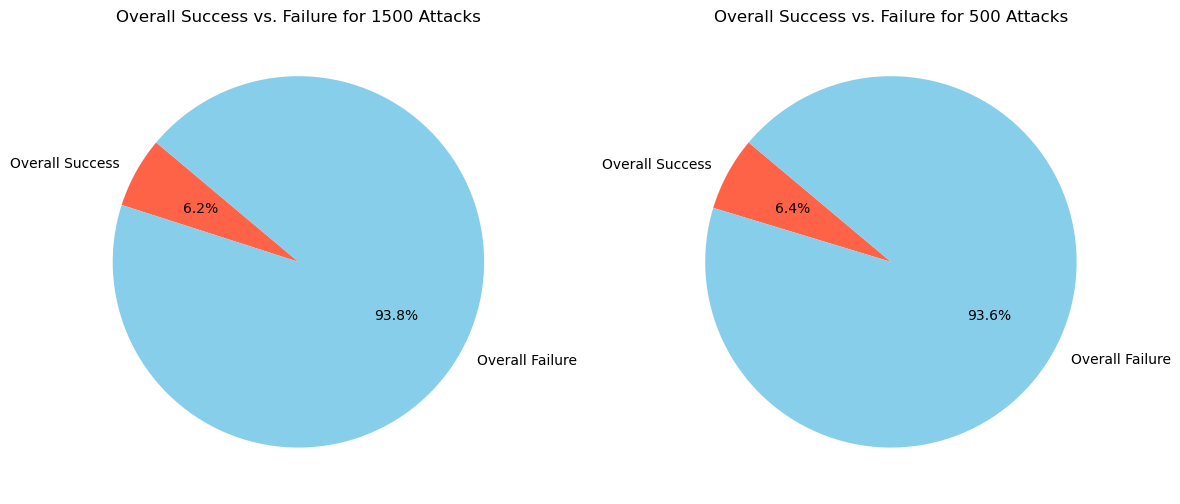

In [76]:
import matplotlib.pyplot as plt

# Data for plotting
attacks = ['Main Attack', 'Baseline Attack', 'Control Attack']
success_rates_1500 = [0.1336, 0.0132, 0.0378]
success_rates_500 = [0.1308, 0.0137, 0.0480]

# Overall success vs. failure rates calculated from the given data for illustrative purposes
# Assuming "success" combines all types of attacks and "failure" is the complement to 1
overall_success_1500 = sum(success_rates_1500) / len(success_rates_1500)
overall_failure_1500 = 1 - overall_success_1500
overall_success_500 = sum(success_rates_500) / len(success_rates_500)
overall_failure_500 = 1 - overall_success_500

print('Multivariate Risk Assessment Success vs. Failure Rates on 80% AE Synthetic Obesity Data')

# Pie charts for overall success vs. failure
fig, axs_pie = plt.subplots(1, 2, figsize=(12, 6))

axs_pie[0].pie([overall_success_1500, overall_failure_1500], labels=['Overall Success', 'Overall Failure'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'skyblue'])
axs_pie[0].set_title('Overall Success vs. Failure for 1500 Attacks')

axs_pie[1].pie([overall_success_500, overall_failure_500], labels=['Overall Success', 'Overall Failure'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'skyblue'])
axs_pie[1].set_title('Overall Success vs. Failure for 500 Attacks')

plt.tight_layout()
plt.show()


# STEP 4: LINKABILITY RISK ASSESSMENT ON 80% AE SYNTHETIC OBESITY DISEASE DATA
Define auxiliary columns (aux_cols) based on our knowledge of what an attacker might know.

In [84]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(obesity_train_dataframe), len(ae_synthetic_obesity_data_with_labels_df_new), len(control_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

aux_cols = [
    ['Gender', 'FAF'],  # Attributes in dataset A
    ['Age', 'FCVC']     # Attributes in dataset B
]

linkability_evaluator2 = LinkabilityEvaluator(ori=obesity_train_dataframe, 
                                             syn=ae_synthetic_obesity_data_with_labels_df, 
                                             control=control_dataframe,
                                             n_attacks=n_attacks,
                                             aux_cols=aux_cols,
                                             n_neighbors=10)

linkability_evaluator2.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk = linkability_evaluator2.risk()
print("Linkability Risk When n_neighbors=10 on 80% AE Synthetic Obesity Disease Data:", linkability_risk)

Linkability Risk When n_neighbors=10 on 80% AE Synthetic Obesity Disease Data: PrivacyRisk(value=0.005278148817860336, ci=(0.0, 0.05297451763121683))


In [85]:
linkability = linkability_evaluator2.results()

print("Linkability Risk When n_neighbors=10 on 80% AE Synthetic Obesity Disease Data:")
print("Successs rate of main attack:", linkability.attack_rate)
print("Successs rate of baseline attack:", linkability.baseline_rate)
print("Successs rate of control attack:", linkability.control_rate)

Linkability Risk When n_neighbors=10 on 80% AE Synthetic Obesity Disease Data:
Successs rate of main attack: SuccessRate(value=0.1169537971973748, error=0.030289617179765842)
Successs rate of baseline attack: SuccessRate(value=0.05604125118594815, error=0.021447200773049437)
Successs rate of control attack: SuccessRate(value=0.11226821673495736, error=0.02974328195776121)


In [86]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(obesity_train_dataframe), len(ae_synthetic_obesity_data_with_labels_df_new), len(control_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

aux_cols = [
    ['Gender', 'FAF'],  # Attributes in dataset A
    ['Age', 'FCVC']     # Attributes in dataset B
]

linkability_evaluator4 = LinkabilityEvaluator(ori=obesity_train_dataframe, 
                                             syn=ae_synthetic_obesity_data_with_labels_df, 
                                             control=control_dataframe,
                                             n_attacks=n_attacks,
                                             aux_cols=aux_cols,
                                             n_neighbors=5)

linkability_evaluator4.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_evaluator4.risk()
print("Linkability Risk When n_neighbors=5 on 80% AE Synthetic Obesity Disease Data:", linkability_risk1)

Linkability Risk When n_neighbors=5 on 80% AE Synthetic Obesity Disease Data: PrivacyRisk(value=0.021955464445396807, ci=(0.0, 0.051567682178833604))


In [87]:
linkability5 = linkability_evaluator4.results()

print("Linkability Risk When n_neighbors=5 on 80% AE Synthetic Obesity Disease Data:")
print("Successs rate of main attack:", linkability5.attack_rate)
print("Successs rate of baseline attack:", linkability5.baseline_rate)
print("Successs rate of control attack:", linkability5.control_rate)

Linkability Risk When n_neighbors=5 on 80% AE Synthetic Obesity Disease Data:
Successs rate of main attack: SuccessRate(value=0.060726831648365585, error=0.022306179402846193)
Successs rate of baseline attack: SuccessRate(value=0.009185446561773811, error=0.00788786306927548)
Successs rate of control attack: SuccessRate(value=0.03964171956748713, error=0.018036100289888352)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

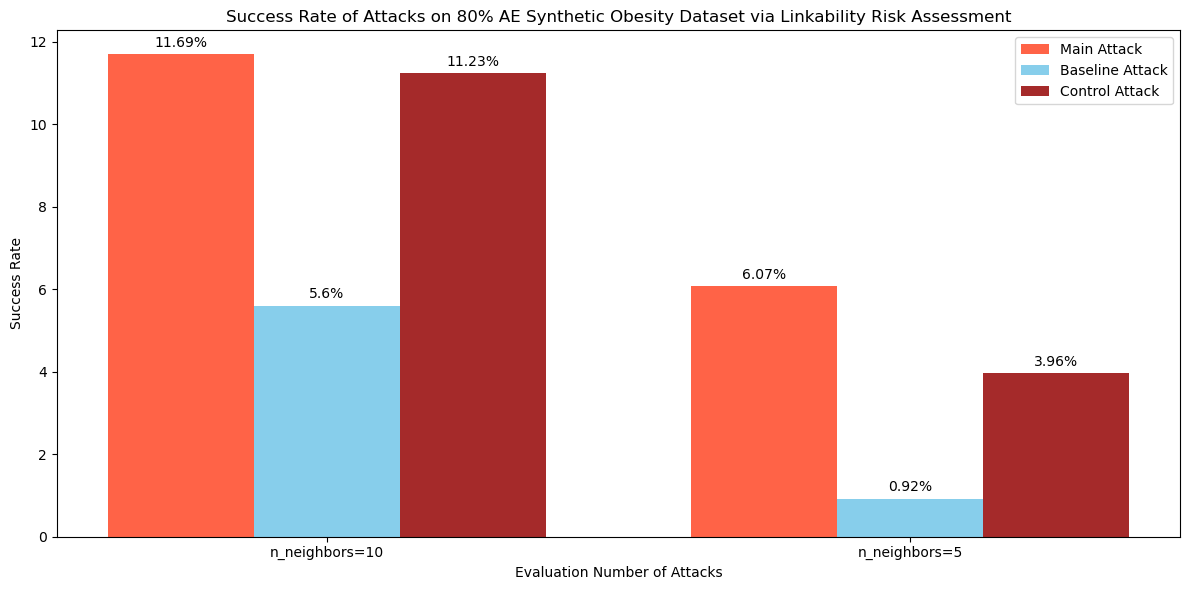

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data_singling_out_univariate = [
    ('n_neighbors=10', 11.69, 5.60, 11.23),
    ('n_neighbors=5', 6.07, 0.92, 3.96)
]

# Convert to DataFrame
df_singling_out_univariate = pd.DataFrame(data_singling_out_univariate, columns=['Evaluation', 'SuccessRateMainAttack', 'SuccessRateBaselineAttack', 'SuccessRateControlAttack'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(df_singling_out_univariate))
bar_width = 0.25

bars1 = plt.bar(index, df_singling_out_univariate['SuccessRateMainAttack'], bar_width, label='Main Attack', color='tomato')
bars2 = plt.bar(index + bar_width, df_singling_out_univariate['SuccessRateBaselineAttack'], bar_width, label='Baseline Attack', color='skyblue')
bars3 = plt.bar(index + 2 * bar_width, df_singling_out_univariate['SuccessRateControlAttack'], bar_width, label='Control Attack', color='brown')

# Function to add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.xlabel('Evaluation Number of Attacks')
plt.ylabel('Success Rate')
plt.title('Success Rate of Attacks on 80% AE Synthetic Obesity Dataset via Linkability Risk Assessment')
plt.xticks(index + bar_width, df_singling_out_univariate['Evaluation'])
plt.legend()

plt.tight_layout()
plt.show()


Linkability Risk Assessment Success vs. Failure Rates on 80% AE Synthetic Obesity Data


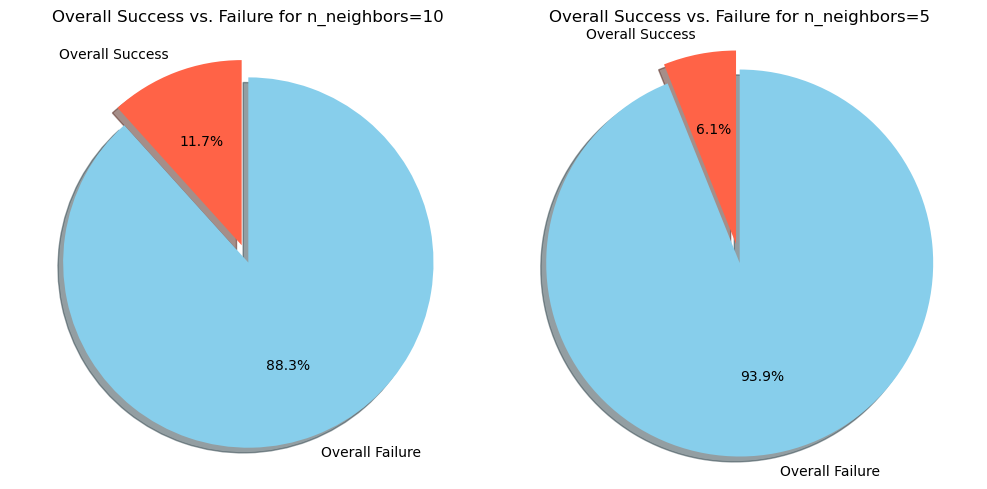

In [92]:
import matplotlib.pyplot as plt

# Data setup
sizes_10 = [11.69, 88.31]  # Success vs. Failure for n_neighbors=10
sizes_5 = [6.07, 93.93]  # Success vs. Failure for n_neighbors=5
labels = ['Overall Success', 'Overall Failure']
explode = (0.1, 0)
colors = ['tomato','skyblue']  # Customizable colors

print('Linkability Risk Assessment Success vs. Failure Rates on 80% AE Synthetic Obesity Data')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Pie chart for n_neighbors=10
axs[0].pie(sizes_10, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90, colors=colors)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Overall Success vs. Failure for n_neighbors=10')

# Pie chart for n_neighbors=5
axs[1].pie(sizes_5, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90, colors=colors)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Overall Success vs. Failure for n_neighbors=5')

plt.tight_layout()
plt.show()


# STEP 5: INFERENCE RISK ASSESSMENT ON 80% AE SYNTHETIC OBESITY DISEASE DATA
Iterate over each column in your dataset to assess inference risk. For a more detailed example, you might select fewer columns to speed up the process.

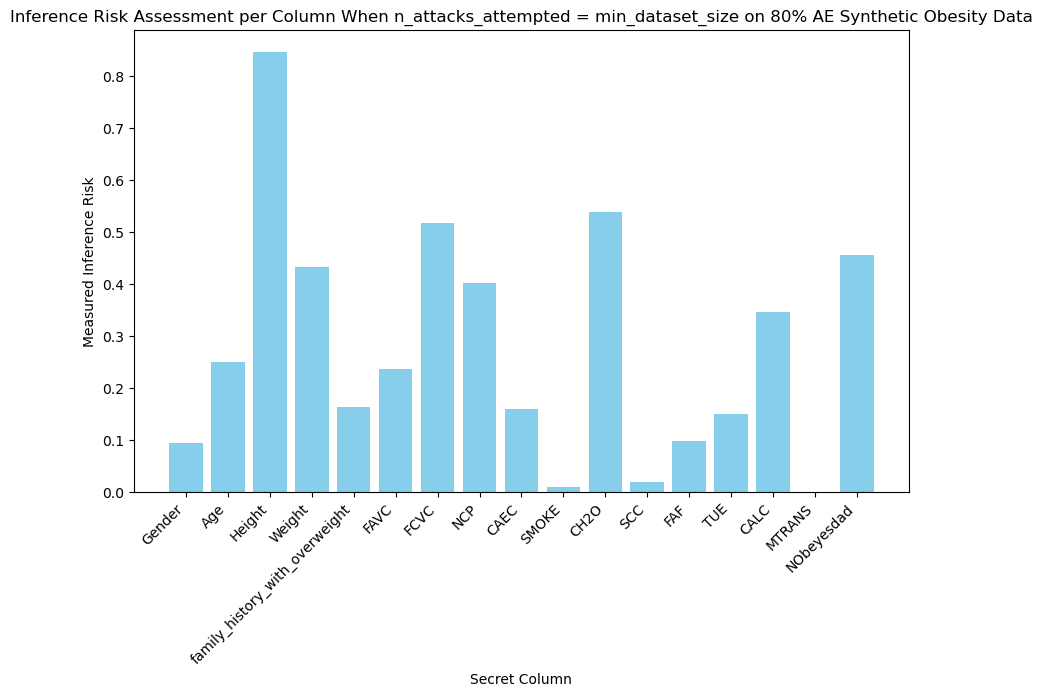

In [98]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(obesity_train_dataframe), len(ae_synthetic_obesity_data_with_labels_df), len(control_dataframe))
n_attacks_attempted = min_dataset_size  # Or some fraction of the smallest size, if desired


columns = obesity_train_dataframe.columns
inference_results2 = []

for secret in columns:
    aux_cols = [col for col in columns if col != secret]
    
    evaluator_inferense2 = InferenceEvaluator(ori=obesity_train_dataframe, 
                                   syn=ae_synthetic_obesity_data_with_labels_df, 
                                   control=control_dataframe,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks_attempted) # Use the dynamically set value
    evaluator_inferense2.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
    inference_results2.append((secret,  evaluator_inferense2.risk()))

# Plotting the inference risks
import matplotlib.pyplot as plt

risks = [res[1].value for res in inference_results2]
columns = [res[0] for res in inference_results2]

plt.figure(figsize=(10, 6))
plt.bar(columns, risks, color='skyblue')
plt.xlabel('Secret Column')
plt.ylabel('Measured Inference Risk')
plt.xticks(rotation=45, ha='right')
plt.title('Inference Risk Assessment per Column When n_attacks_attempted = min_dataset_size on 80% AE Synthetic Obesity Data')
plt.show()

In [99]:
inference2 =  evaluator_inferense2.results()

print("Inference Risk Assessment Per Column When n_attacks_attempted = min_dataset_size on 80% AE Synthetic Obesity Disease Data:")
print("Successs rate of main attack:", inference2.attack_rate)
print("Successs rate of baseline attack:", inference2.baseline_rate)
print("Successs rate of control attack:", inference2.control_rate)

Inference Risk Assessment Per Column When n_attacks_attempted = min_dataset_size on 80% AE Synthetic Obesity Disease Data:
Successs rate of main attack: SuccessRate(value=0.8877317832650427, error=0.02974328195776121)
Successs rate of baseline attack: SuccessRate(value=0.16380960182154913, error=0.0349787068085773)
Successs rate of control attack: SuccessRate(value=0.794020174016694, error=0.03827348937139488)


In [100]:
print("Inference Risk Assessment Per Column When n_attacks_attempted = min_dataset_size on 80% AE Synthetic Obesity Disease Data:", inference_results2)

Inference Risk Assessment Per Column When n_attacks_attempted = min_dataset_size on 80% AE Synthetic Obesity Disease Data: [('Gender', PrivacyRisk(value=0.09445273529622862, ci=(0.0, 0.2114938641452136))), ('Age', PrivacyRisk(value=0.24885436234846312, ci=(0.1264407470907047, 0.37126797760622154))), ('Height', PrivacyRisk(value=0.8474457215778525, ci=(0.7411853331620666, 0.9537061099936384))), ('Weight', PrivacyRisk(value=0.43294924059410345, ci=(0.314020507221262, 0.5518779739669449))), ('family_history_with_overweight', PrivacyRisk(value=0.16227805294544814, ci=(0.0, 0.36362259008917863))), ('FAVC', PrivacyRisk(value=0.23556873047306448, ci=(0.0, 0.4906869132653721))), ('FCVC', PrivacyRisk(value=0.5181593579376303, ci=(0.418852991407625, 0.6174657244676357))), ('NCP', PrivacyRisk(value=0.40234725165154167, ci=(0.28621177163222655, 0.5184827316708568))), ('CAEC', PrivacyRisk(value=0.1585402730785219, ci=(0.0, 0.373090683030594))), ('SMOKE', PrivacyRisk(value=0.009805826749187363, ci=(

# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

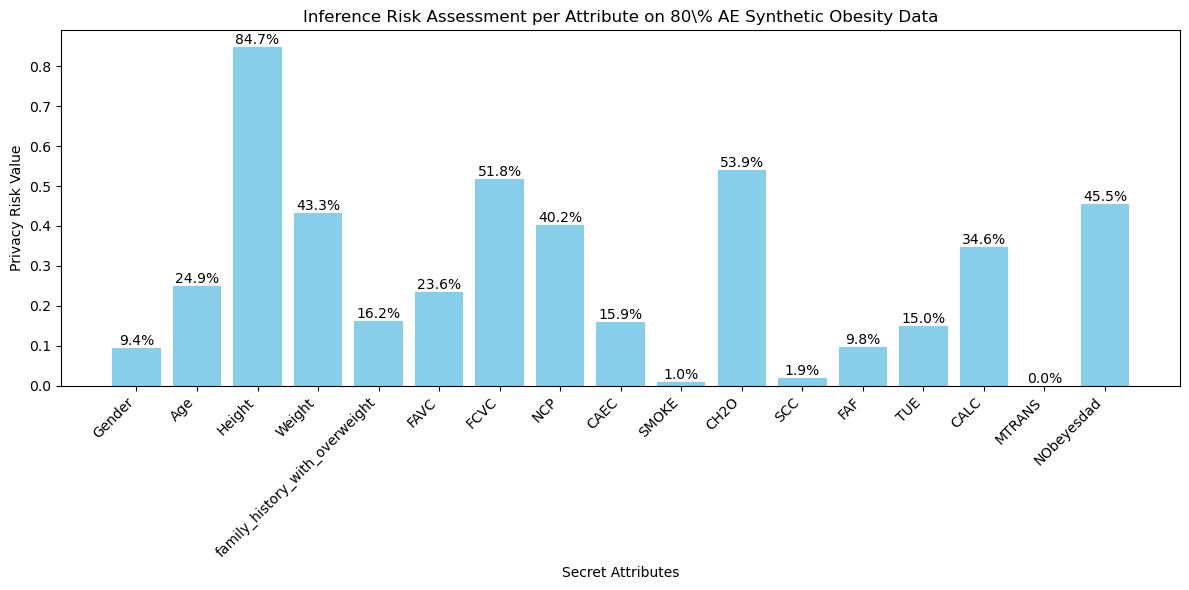

In [113]:
import matplotlib.pyplot as plt

# Assuming 'inference_results2' contains the updated risk assessments
risks2 = [res[1].value for res in inference_results2]
columns2 = [res[0] for res in inference_results2]

plt.figure(figsize=(12, 6))
bars = plt.bar(columns2, risks2, color='skyblue')  # Using a different color for distinction

plt.xlabel('Secret Attributes')
plt.ylabel('Privacy Risk Value')
plt.xticks(rotation=45, ha='right')
plt.title('Inference Risk Assessment per Attribute on 80\% AE Synthetic Obesity Data')

# Adding percentage values on top of all bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Success vs. Failure Rates of Inference Risk Assessment By Attack Types on AE Synthetic Obesity Data


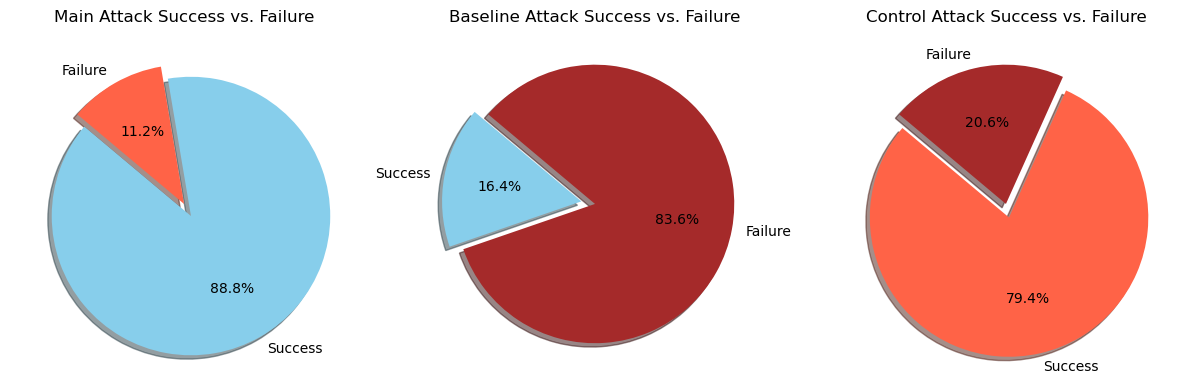

In [125]:
import matplotlib.pyplot as plt

# Data for pie charts (Example values)
success_rates = [0.8877, 0.1638, 0.7940]  # Main, Baseline, Control success rates
labels = ['Success', 'Failure']
colors = ['skyblue', 'brown']

# Adjust explode for two segments only
explode = (0.1, 0)  # Explode the first slice (Success)

# Pie Chart for Overall Success vs. Failure
plt.figure(figsize=(12, 6))
print('Success vs. Failure Rates of Inference Risk Assessment By Attack Types on AE Synthetic Obesity Data')
# Success vs. Failure Pie Chart for Main Attack
plt.subplot(1, 3, 1)
sizes = [success_rates[0]*100, (1-success_rates[0])*100]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140, colors=[colors[0], 'tomato'])
plt.title('Main Attack Success vs. Failure')

# Success vs. Failure Pie Chart for Baseline Attack
plt.subplot(1, 3, 2)
sizes = [success_rates[1]*100, (1-success_rates[1])*100]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140, colors=['skyblue', 'brown'])
plt.title('Baseline Attack Success vs. Failure')

# Success vs. Failure Pie Chart for Control Attack
plt.subplot(1, 3, 3)
sizes = [success_rates[2]*100, (1-success_rates[2])*100]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140, colors=['tomato', colors[1]])
plt.title('Control Attack Success vs. Failure')

plt.tight_layout()
plt.show()


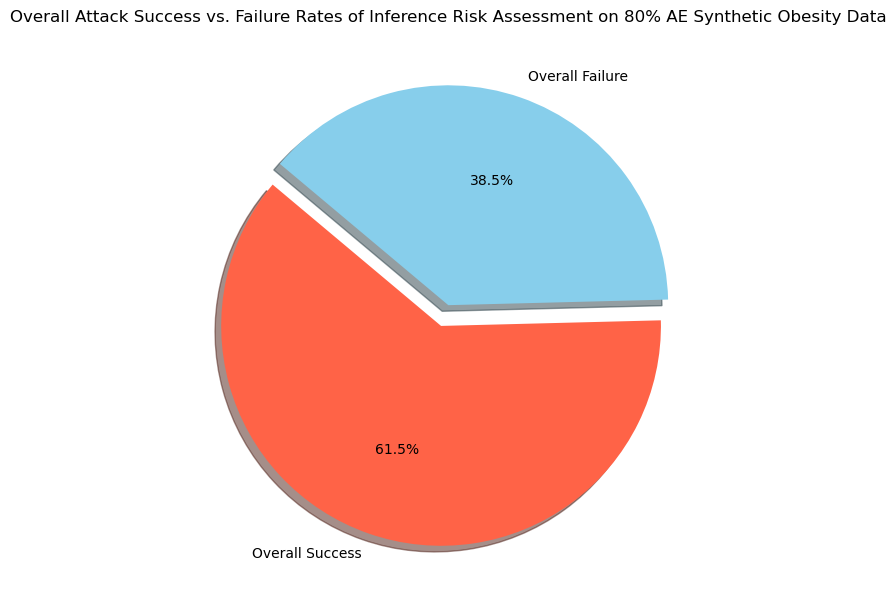

In [126]:
import matplotlib.pyplot as plt

# Overall success rate (average of the three success rates)
overall_success_rate = sum(success_rates) / len(success_rates)

# Data for overall success vs. failure pie chart
sizes_overall = [overall_success_rate*100, (1-overall_success_rate)*100]
labels = ['Overall Success', 'Overall Failure']
explode = (0.1, 0)  # Explode the first slice (Overall Success)
colors_overall = ['tomato', 'skyblue']  # Custom colors for overall pie chart

plt.figure(figsize=(7, 6))

# Overall Success vs. Failure Pie Chart
plt.pie(sizes_overall, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140, colors=colors_overall)
plt.title('Overall Attack Success vs. Failure Rates of Inference Risk Assessment on 80% AE Synthetic Obesity Data')

plt.tight_layout()
plt.show()
